# Bibliotecas

In [1]:
import pandas as pd
import math
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Dicionário das Variáveis

In [5]:
info = pd.read_excel('enade_combinado/dicionario_completo_2018.xlsx', header=1)

In [6]:
info.dropna(subset=['Nº'], inplace=True)

In [7]:
info.reset_index(drop=True, inplace=True)

In [8]:
info.iloc[0]

Nº                                     1
NOME                              NU_ANO
TIPO                                   N
TAMANHO                              4.0
DESCRIÇÃO     Ano de realização do exame
CATEGORIAS                          2018
Name: 0, dtype: object

In [9]:
dic = pd.read_csv('enade_combinado/dicionario_categorias.csv')

In [10]:
conceito = dic[dic['NOME']=='CO_GRUPO']

In [11]:
conceito[['COD_CATEGORIAS', 'CATEGORIAS']] = conceito['CATEGORIAS'].str.split('=', expand=True)

In [12]:
conceito

,NOME,CATEGORIAS,COD_CATEGORIAS
0,CO_GRUPO,MEDICINA VETERINÁRIA,5
1,CO_GRUPO,ODONTOLOGIA,6
2,CO_GRUPO,MEDICINA,12
3,CO_GRUPO,AGRONOMIA,17
4,CO_GRUPO,FARMÁCIA,19
...,...,...,...
105,CO_GRUPO,TECNOLOGIA EM DESIGN GRÁFICO,104
106,CO_GRUPO,TECNOLOGIA EM GESTÃO DA QUALIDADE,105
107,CO_GRUPO,TECNOLOGIA EM GESTÃO PÚBLICA,106
108,CO_GRUPO,COMUNICAÇÃO SOCIAL - JORNALISMO,803


In [13]:
conceito['CATEGORIAS'].unique()

array([' MEDICINA VETERINÁRIA', ' ODONTOLOGIA', ' MEDICINA', ' AGRONOMIA',
       ' FARMÁCIA', ' ENFERMAGEM', ' FONOAUDIOLOGIA', ' NUTRIÇÃO',
       ' FISIOTERAPIA', ' SERVIÇO SOCIAL', ' ZOOTECNIA', ' BIOMEDICINA',
       ' TECNOLOGIA EM RADIOLOGIA', ' TECNOLOGIA EM AGRONEGÓCIOS',
       ' TECNOLOGIA EM GESTÃO HOSPITALAR',
       ' TECNOLOGIA EM GESTÃO AMBIENTAL',
       ' TECNOLOGIA EM ESTÉTICA E COSMÉTICA',
       ' EDUCAÇÃO FÍSICA (BACHARELADO)', ' Arquitetura e Urbanismo',
       ' Tecnologia em Análise e Desenvolvimento de Sistemas',
       ' Tecnologia em Gestão da Produção Industrial',
       ' Tecnologia em Redes de Computadores',
       ' Matemática (Bacharelado)', ' Matemática (Licenciatura)',
       ' Letras-Português (Bacharelado)',
       ' Letras-Português (Licenciatura)',
       ' Letras-Português e Inglês (Licenciatura)',
       ' Letras-Português e Espanhol (Licenciatura)',
       ' Física (Bacharelado)', ' Física (Licenciatura)',
       ' Química (Bacharelado)', ' Quí

In [14]:
cursos_tech = [' Tecnologia em Análise e Desenvolvimento de Sistemas', ' Tecnologia em Redes de Computadores', ' Engenharia Da Computação', ' Ciência Da Computação (Bacharelado)', 
               ' Ciência Da Computação (Licenciatura)', ' Sistemas De Informação', ' Tecnologia em Gestão da Tecnologia da Informação']

In [15]:
df_tech = conceito[conceito['CATEGORIAS'].isin(cursos_tech)]

In [16]:
df_tech['COD_CATEGORIAS'] = df_tech.COD_CATEGORIAS.astype(int)

In [17]:
df_tech

,NOME,CATEGORIAS,COD_CATEGORIAS
19,CO_GRUPO,Tecnologia em Análise e Desenvolvimento de Si...,72
21,CO_GRUPO,Tecnologia em Redes de Computadores,79
43,CO_GRUPO,Engenharia Da Computação,4003
44,CO_GRUPO,Ciência Da Computação (Bacharelado),4004
45,CO_GRUPO,Ciência Da Computação (Licenciatura),4005
46,CO_GRUPO,Sistemas De Informação,4006
61,CO_GRUPO,Tecnologia em Gestão da Tecnologia da Informação,6409


In [18]:
cod_tech = df_tech['COD_CATEGORIAS'].unique()

# Análise Exploratória

## Total cursos

In [2]:
df_total = pd.read_csv('enade_combinado/dados_enade.csv', sep=',')

In [23]:
df_total

,ANO_FIM_EM,ANO_IN_GRAD,CO_CATEGAD,CO_CURSO,CO_GRUPO,CO_IES,CO_MODALIDADE,CO_MUNIC_CURSO,CO_ORGACAD,CO_REGIAO_CURSO,CO_RS_I1,CO_RS_I2,CO_RS_I3,CO_RS_I4,CO_RS_I5,CO_RS_I6,CO_RS_I7,CO_RS_I8,CO_RS_I9,CO_TURNO_GRADUACAO,CO_UF_CURSO,DS_VT_ACE_OCE,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ESC_OFG,DS_VT_GAB_OCE_FIN,DS_VT_GAB_OCE_ORIG,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OFG_ORIG,ENADE_ANO,NT_CE,NT_CE_D1,NT_CE_D2,NT_CE_D3,NT_DIS_CE,NT_DIS_FG,NT_FG,NT_FG_D1,NT_FG_D1_CT,NT_FG_D1_PT,NT_FG_D2,NT_FG_D2_CT,NT_FG_D2_PT,NT_GER,NT_OBJ_CE,NT_OBJ_FG,NU_ANO,NU_IDADE,NU_ITEM_OCE,...,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,QE_I69,QE_I70,QE_I71,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81,TP_INSCRICAO,TP_INSCRICAO_ADM,TP_PRES,TP_PR_DI_CE,TP_PR_DI_FG,TP_PR_GER,TP_PR_OB_CE,TP_PR_OB_FG,TP_SCE_D1,TP_SCE_D2,TP_SCE_D3,TP_SEXO,TP_SFG_D1,TP_SFG_D2
0,2009.0,2010.0,10002,7,38,1,1,5103403,10028,5,.,.,.,.,.,.,.,.,.,1.0,51,NaN,NaN,NaN,NaN,DXXEZBBCBZAECBZBACAEDZECXEX,DCDEZBBCBZAECBZBACAEDZECCEA,CAEBCDAC,CAEBCDAC,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,35,27,...,3.0,3.0,6.0,6.0,5.0,8.0,8.0,6.0,6.0,3.0,6.0,6.0,1.0,1.0,5.0,4.0,4.0,1.0,1.0,6.0,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,F,222.0,222.0
1,2008.0,2013.0,10002,7,38,1,1,5103403,10028,5,D,D,A,A,C,C,D,C,B,1.0,51,099181101811018110111811909,11000100.0,EEEEDBBABAAEEBABAAAEDEECDCB,CABADDBD,DXXEZBBCBZAECBZBACAEDZECXEX,DCDEZBBCBZAECBZBACAEDZECCEA,CAEBCDAC,CAEBCDAC,2016,62.6,0.0,0.0,0.0,0.0,0.0,22.5,0.0,0.0,0.0,0.0,0.0,0.0,52.6,73.7,37.5,2016,24,27,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.0,555.0,333.0,555.0,555.0,555.0,555.0,333.0,555.0,F,333.0,333.0
2,2012.0,2013.0,10002,7,38,1,1,5103403,10028,5,C,C,B,B,B,C,B,D,E,3.0,51,199181111811108111111811919,10110111.0,DABEDBBCBDAECEDBACAEDEECEEB,CBEBADAC,DXXEZBBCBZAECBZBACAEDZECXEX,DCDEZBBCBZAECBZBACAEDZECCEA,CAEBCDAC,CAEBCDAC,2016,88.5,40.0,80.0,40.0,53.3,60.0,69.0,55.0,50.0,75.0,65.0,60.0,85.0,83.6,94.7,75.0,2016,21,27,...,4.0,4.0,6.0,6.0,6.0,1.0,1.0,4.0,5.0,5.0,6.0,4.0,4.0,1.0,5.0,7.0,7.0,5.0,4.0,7.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,F,555.0,555.0
3,2004.0,2012.0,10002,7,38,1,1,5103403,10028,5,C,D,A,B,B,B,D,E,C,3.0,51,099181110810008100010811909,110110.0,EDDEEBBCDEABEDDBEABEEDECDBB,AEEBADAE,DXXEZBBCBZAECBZBACAEDZECXEX,DCDEZBBCBZAECBZBACAEDZECCEA,CAEBCDAC,CAEBCDAC,2016,43.3,60.0,0.0,0.0,20.0,36.0,44.4,13.0,0.0,65.0,59.0,60.0,55.0,43.6,47.4,50.0,2016,30,27,...,6.0,5.0,6.0,6.0,6.0,4.0,4.0,6.0,6.0,3.0,6.0,6.0,4.0,4.0,4.0,3.0,5.0,4.0,4.0,6.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,333.0,F,555.0,555.0
4,2009.0,2013.0,10002,7,38,1,1,5103403,10028,5,C,D,C,D,B,C,C,D,D,3.0,51,099081111811108110111811919,11101101.0,ACBCDBBCBEAECDDBADAEDDECAED,CAEACDBC,DXXEZBBCBZAECBZBACAEDZECXEX,DCDEZBBCBZAECBZBACAEDZECCEA,CAEBCDAC,CAEBCDAC,2016,75.1,40.0,60.0,60.0,53.3,52.0,65.8,68.0,70.0,60.0,36.0,30.0,60.0,72.8,78.9,75.0,2016,23,27,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,6.0,6.0,6.0,6.0,6.0,2.0,4.0,5.0,5.0,3.0,2.0,6.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,F,555.0,555.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301595,2013.0,2014.0,10008,1105114,13,1723,1,35478

In [3]:
df_total['NT_GER'].mean()

43.4415688635415

In [19]:
df_total[~df_total['CO_GRUPO'].isin(cod_tech)]['NT_GER'].mean()

43.47176609026623

Cursos tecnologia

In [25]:
df = df_total[df_total['CO_GRUPO'].isin(cod_tech)].reset_index(drop=True)

In [26]:
pd.options.display.max_columns=151
df

,ANO_FIM_EM,ANO_IN_GRAD,CO_CATEGAD,CO_CURSO,CO_GRUPO,CO_IES,CO_MODALIDADE,CO_MUNIC_CURSO,CO_ORGACAD,CO_REGIAO_CURSO,CO_RS_I1,CO_RS_I2,CO_RS_I3,CO_RS_I4,CO_RS_I5,CO_RS_I6,CO_RS_I7,CO_RS_I8,CO_RS_I9,CO_TURNO_GRADUACAO,CO_UF_CURSO,DS_VT_ACE_OCE,DS_VT_ACE_OFG,DS_VT_ESC_OCE,DS_VT_ESC_OFG,DS_VT_GAB_OCE_FIN,DS_VT_GAB_OCE_ORIG,DS_VT_GAB_OFG_FIN,DS_VT_GAB_OFG_ORIG,ENADE_ANO,NT_CE,NT_CE_D1,NT_CE_D2,NT_CE_D3,NT_DIS_CE,NT_DIS_FG,NT_FG,NT_FG_D1,NT_FG_D1_CT,NT_FG_D1_PT,NT_FG_D2,NT_FG_D2_CT,NT_FG_D2_PT,NT_GER,NT_OBJ_CE,NT_OBJ_FG,NU_ANO,NU_IDADE,NU_ITEM_OCE,NU_ITEM_OCE_N,NU_ITEM_OCE_X,NU_ITEM_OCE_Z,NU_ITEM_OFG,NU_ITEM_OFG_N,NU_ITEM_OFG_X,NU_ITEM_OFG_Z,QE_I01,QE_I02,QE_I03,QE_I04,QE_I05,QE_I06,QE_I07,QE_I08,QE_I09,QE_I10,QE_I11,QE_I12,QE_I13,QE_I14,QE_I15,QE_I16,QE_I17,QE_I18,QE_I19,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26,QE_I27,QE_I28,QE_I29,QE_I30,QE_I31,QE_I32,QE_I33,QE_I34,QE_I35,QE_I36,QE_I37,QE_I38,QE_I39,QE_I40,QE_I41,QE_I42,QE_I43,QE_I44,QE_I45,QE_I46,QE_I47,QE_I48,QE_I49,QE_I50,QE_I51,QE_I52,QE_I53,QE_I54,QE_I55,QE_I56,QE_I57,QE_I58,QE_I59,QE_I60,QE_I61,QE_I62,QE_I63,QE_I64,QE_I65,QE_I66,QE_I67,QE_I68,QE_I69,QE_I70,QE_I71,QE_I72,QE_I73,QE_I74,QE_I75,QE_I76,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81,TP_INSCRICAO,TP_INSCRICAO_ADM,TP_PRES,TP_PR_DI_CE,TP_PR_DI_FG,TP_PR_GER,TP_PR_OB_CE,TP_PR_OB_FG,TP_SCE_D1,TP_SCE_D2,TP_SCE_D3,TP_SEXO,TP_SFG_D1,TP_SFG_D2
0,2014.0,2014.0,1,36,4004,1,1,5103403,10028,5,D,C,C,B,B,B,B,D,E,3.0,51,101111011001910199011010000,1011101.0,ABECBCCEACCDCCDEECADEDEEECD,DCCBCEDD,ACECBCDEADEDXCAEXXBDEBEBDAE,ACECBCDEADEDACAECEBDEBEBDAE,CCBBCEAD,CCBBCEAD,2017,55.6,70.0,30.0,90.0,63.3,76.0,67.9,79.0,80.0,75.0,73.0,75.0,65.0,58.7,54.2,62.5,2017,23,27,0,3,0,8,0,0,0,A,D,A,D,F,B,B,E,C,A,A,A,B,A,F,51.0,A,A,B,G,A,B,E,E,A,C,5.0,6.0,6.0,5.0,6.0,4.0,5.0,5.0,6.0,6.0,4.0,7.0,5.0,5.0,5.0,6.0,5.0,6.0,5.0,5.0,5.0,5.0,6.0,8.0,7.0,8.0,8.0,6.0,5.0,6.0,5.0,7.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,M,555.0,555.0
1,2012.0,2014.0,1,36,4004,1,1,5103403,10028,5,E,E,C,B,B,D,B,C,C,3.0,51,011110011111910099010000100,10000.0,DCECBBAEADEDDCDACEEDCDDCDCD,BDDBDCCE,ACECBCDEADEDXCAEXXBDEBEBDAE,ACECBCDEADEDACAECEBDEBEBDAE,CCBBCEAD,CCBBCEAD,2017,56.3,100.0,75.0,100.0,91.7,57.0,30.3,64.0,65.0,60.0,50.0,50.0,50.0,49.8,50.0,12.5,2017,22,27,0,3,0,8,0,0,0,A,A,A,D,C,A,A,C,B,A,A,D,C,A,A,51.0,A,B,B,A,A,C,C,B,C,A,6.0,5.0,5.0,6.0,5.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,555.0,M,555.0,555.0
2,2008.0,2014.0,1,36,4004,1,1,5103403,10028,5,.,.,.,.,.,.,.,.,.,3.0,51,NaN,NaN,NaN,NaN,ACECBCDEADEDXCAEXXBDEBEBDAE,ACECBCDEADEDACAECEBDEBEBDAE,CCBBCEAD,CCBBCEAD,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,25,27,0,3,0,8,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,222.0,M,222.0,222.0
3,2012.0,2013.0,1,36,4004,1,1,5103403,10028,5,B,E,D,B,D,D,B,D,B,3.0,51,100010011000900099010001101,10011100.0,AEAEBDBEACCEBADCEADDACBBDDE,CADBCEEC,ACECBCDEADEDXCAEXXBDEBEBDAE,ACECBCDEADEDACAECEBDEBEBDAE,CCBBCEAD,CCBBCEAD,2017,34.3,20.0,0.0,100.0,40.0,68.5,57.4,67.0,70.0,55.0,70.0,70.0,70.0,40.1,33.3,50.0,2017,23,27,0,3,0,8,0,0,0,A,A,A,D,D,B,F,C,E,A,A,A,B,A,D,51.0,A,B,B,B,B,B,C,A,B,C,4.0,4.0,5.0,3.0,6.0,4.0,6.0,4.0,4.0,5.0,2.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,2.0,3.0,4.0,5.0,8.0,8.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,7.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,555.

In [27]:
# pd.DataFrame(df.columns).head(151)
df.columns

Index(['ANO_FIM_EM', 'ANO_IN_GRAD', 'CO_CATEGAD', 'CO_CURSO', 'CO_GRUPO',
       'CO_IES', 'CO_MODALIDADE', 'CO_MUNIC_CURSO', 'CO_ORGACAD',
       'CO_REGIAO_CURSO',
       ...
       'TP_PR_DI_FG', 'TP_PR_GER', 'TP_PR_OB_CE', 'TP_PR_OB_FG', 'TP_SCE_D1',
       'TP_SCE_D2', 'TP_SCE_D3', 'TP_SEXO', 'TP_SFG_D1', 'TP_SFG_D2'],
      dtype='object', length=151)

In [28]:
df['NT_GER'].mean()

42.64678700004913

## Informação dos cursos

Quantidade de cursos na área de tecnologia

In [29]:
len(df.CO_CURSO.unique())

1695

Quantidade de IES na área de tecnologia

In [30]:
len(df.CO_IES.unique())

787

Categorias administrativas

In [31]:
len(df.CO_CATEGAD.unique())

6

In [32]:
df.CO_CATEGAD.value_counts()

4    19480
5    14191
1    10614
2     6049
3      468
7      210
Name: CO_CATEGAD, dtype: int64

- Organização acadêmica - CO_ORGACAD


In [33]:
len(df.CO_ORGACAD.unique())

5

In [34]:
df.CO_ORGACAD.value_counts()

10028    24506
10022    13222
10020     9682
10026     3474
10019      128
Name: CO_ORGACAD, dtype: int64

In [35]:
dict_org = { 10028 : 'Universidade',
             10022 : 'Faculdade',
             10020 : 'Centro Universitário',
             10026 : 'Instituto Federal de Educação, Ciência e Tecnologia',
             10019 : 'Centro Federal de Educação Tecnológica'
           }

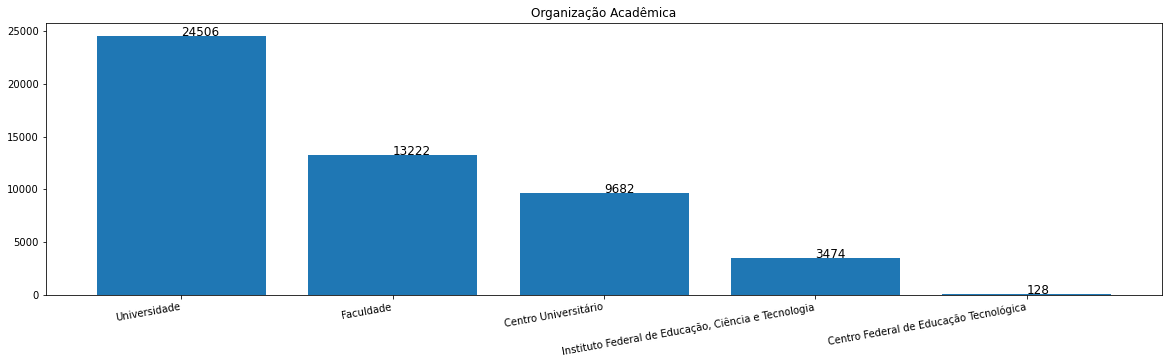

In [36]:
plt.figure(figsize=(20,5))
ax = plt.bar([dict_org[x] for x in list(df.CO_ORGACAD.value_counts().index)], df.CO_ORGACAD.value_counts())
for index in df.CO_ORGACAD.value_counts().index:
    plt.text(dict_org[index], df.CO_ORGACAD.value_counts()[index], df.CO_ORGACAD.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Organização Acadêmica')
ax = ax

In [37]:
agg_org = df.groupby(['CO_ORGACAD']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False).rename(index=dict_org)
agg_org

,NT_GER
CO_ORGACAD,
Centro Federal de Educação Tecnológica,51.920168
Universidade,44.205747
"Instituto Federal de Educação, Ciência e Tecnologia",43.603891
Centro Universitário,40.805684
Faculdade,40.638440


<AxesSubplot:xlabel='CO_ORGACAD', ylabel='NT_GER'>

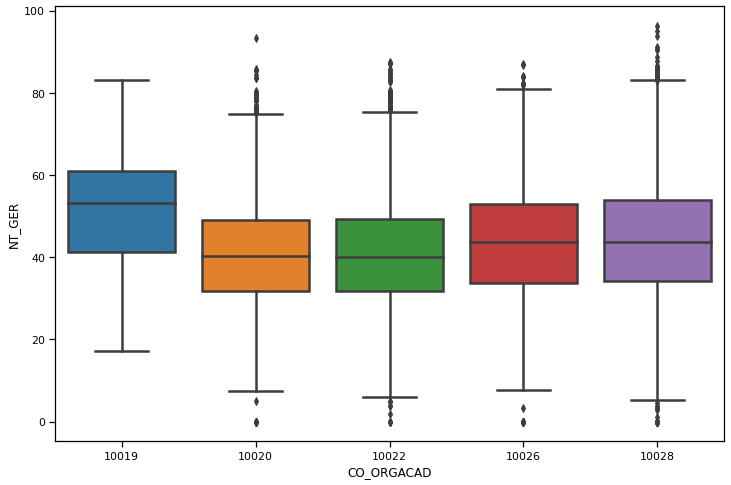

In [303]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='CO_ORGACAD')

- Área de enquadramento do curso no ENADE - CO_GRUPO

In [39]:
len(df.CO_GRUPO.unique())

7

In [40]:
df.CO_GRUPO.value_counts()

4006    14990
72      12538
4004    10186
6409     4566
4003     3913
79       3342
4005     1477
Name: CO_GRUPO, dtype: int64

In [41]:
dict_grup = { 4006 : 'Sistemas de Informação',
              72   : 'Tecnologia em análise de desenvolvimento de sistemas',
              4004 : 'Ciência da Computação (Bacharelado)',
              6409 : 'Tecnologia em gestão da tecnologia da informação',
              4003 : 'Engenharia da computação',
              79   : 'Tecnologia em redes de computadores',
              4005 : 'Ciência da Computação (Licenciatura)'
            }

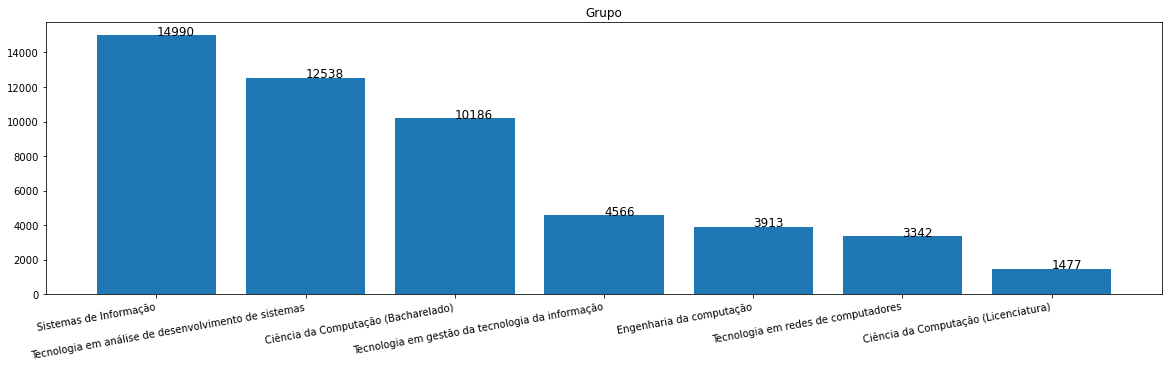

In [42]:
plt.figure(figsize=(20,5))
ax = plt.bar([dict_grup[x] for x in list(df.CO_GRUPO.value_counts().index)], df.CO_GRUPO.value_counts())
for index in df.CO_GRUPO.value_counts().index:
    plt.text(dict_grup[index], df.CO_GRUPO.value_counts()[index], df.CO_GRUPO.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Grupo')
ax = ax

In [43]:
agg_grup = df.groupby(['CO_GRUPO']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False).rename(index=dict_grup)
agg_grup

,NT_GER
CO_GRUPO,
Tecnologia em gestão da tecnologia da informação,45.443394
Engenharia da computação,45.409235
Sistemas de Informação,44.716404
Ciência da Computação (Bacharelado),43.262775
Ciência da Computação (Licenciatura),40.760987
Tecnologia em análise de desenvolvimento de sistemas,40.172842
Tecnologia em redes de computadores,33.664337


<AxesSubplot:xlabel='CO_GRUPO', ylabel='NT_GER'>

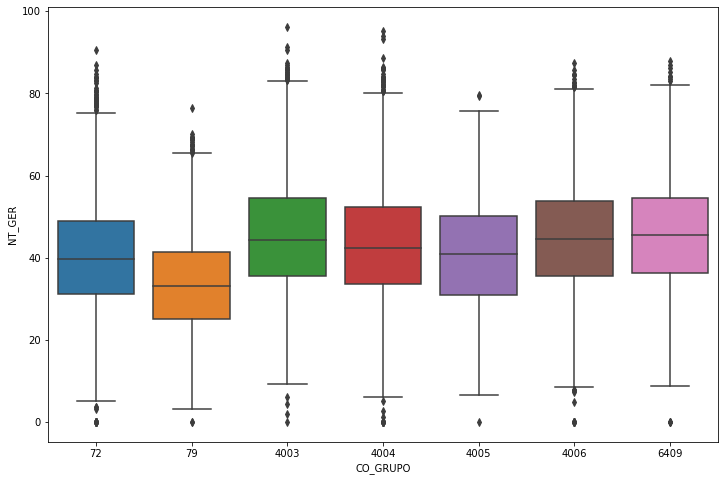

In [44]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='CO_GRUPO')

Modalidade de ensino

In [45]:
len(df.CO_MODALIDADE.unique())

2

In [46]:
df.CO_MODALIDADE.value_counts()

1    44730
2     6282
Name: CO_MODALIDADE, dtype: int64

In [47]:
dict_mod = { 1 : 'Presencial',
             2 : 'EAD'
            }

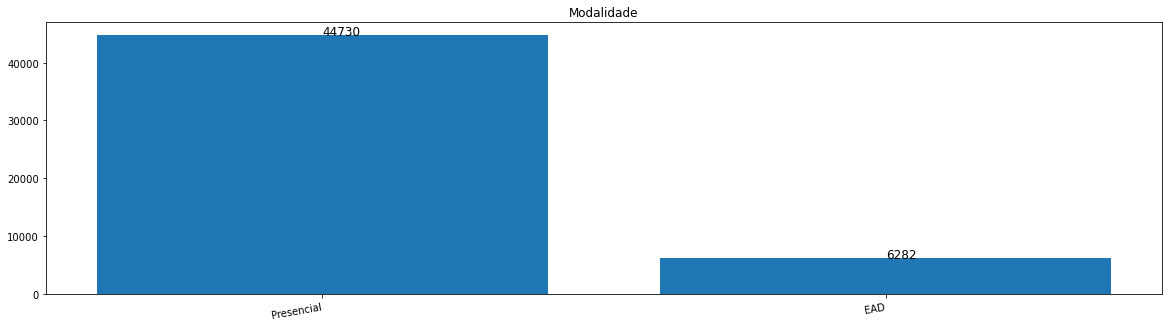

In [48]:
plt.figure(figsize=(20,5))
ax = plt.bar([dict_mod[x] for x in list(df.CO_MODALIDADE.value_counts().index)], df.CO_MODALIDADE.value_counts())
for index in df.CO_MODALIDADE.value_counts().index:
    plt.text(dict_mod[index], df.CO_MODALIDADE.value_counts()[index], df.CO_MODALIDADE.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Modalidade')
ax = ax

In [49]:
agg_mod = df.groupby(['CO_MODALIDADE']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False).rename(index=dict_mod)
agg_mod

,NT_GER
CO_MODALIDADE,
Presencial,42.843229
EAD,41.059816


<AxesSubplot:xlabel='CO_MODALIDADE', ylabel='NT_GER'>

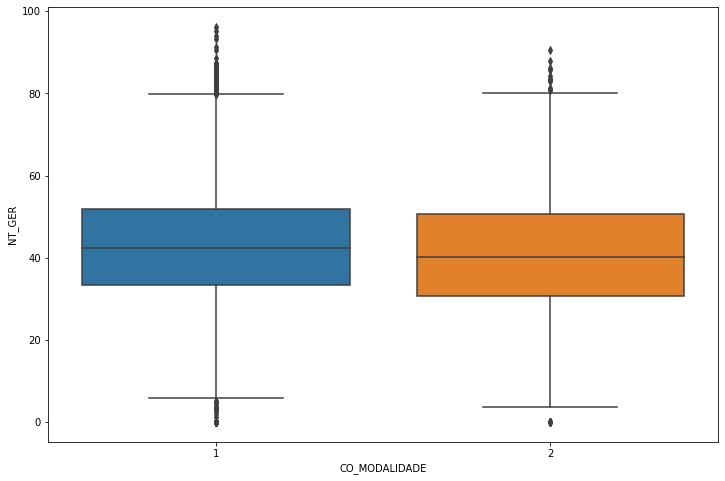

In [50]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='CO_MODALIDADE')

Quantidade de municípios

In [51]:
len(df.CO_MUNIC_CURSO.unique())

446

UF

In [52]:
len(df.CO_UF_CURSO.unique())

27

In [53]:
dict_uf = { 11 : 'RO',
            12 : 'AC',
            13 : 'AM',
            14 : 'RR',
            15 : 'PA',
            16 : 'AP',
            17 : 'TO',
            21 : 'MA',
            22 : 'PI',
            23 : 'CE',
            24 : 'RN',
            25 : 'PB',
            26 : 'PE',
            27 : 'AL',
            28 : 'SE',
            29 : 'BA',
            31 : 'MG',
            32 : 'ES',
            33 : 'RJ',
            35 : 'SP',
            41 : 'PR',
            42 : 'SC',
            43 : 'RS',
            50 : 'MS',
            51 : 'MT',
            52 : 'GO',
            53 : 'DF',
            }

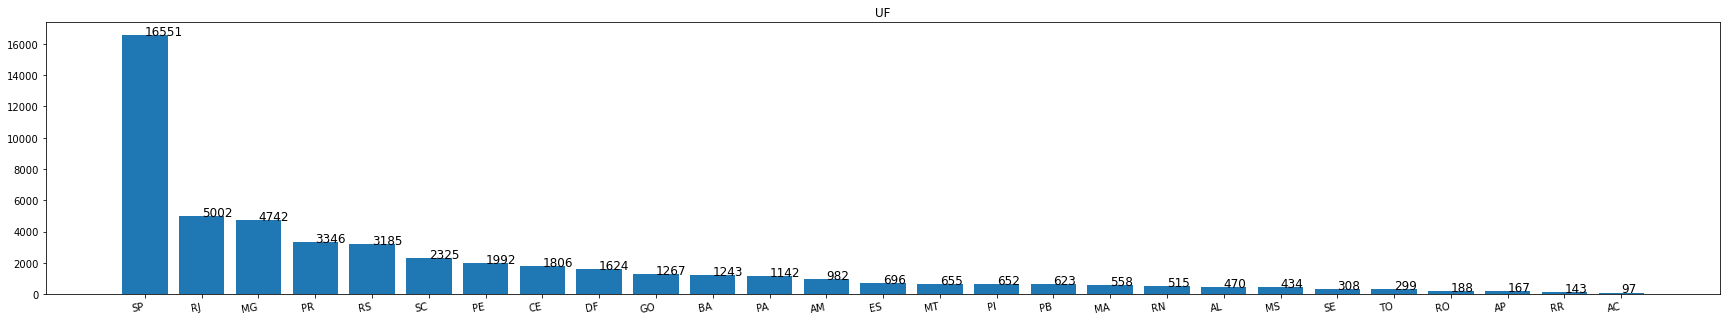

In [54]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_uf[x] for x in list(df.CO_UF_CURSO.value_counts().index)], df.CO_UF_CURSO.value_counts())
for index in df.CO_UF_CURSO.value_counts().index:
    plt.text(dict_uf[index], df.CO_UF_CURSO.value_counts()[index], df.CO_UF_CURSO.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('UF')
ax = ax

In [55]:
agg_uf = df.groupby(['CO_UF_CURSO']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False).rename(index=dict_uf)
agg_uf

,NT_GER
CO_UF_CURSO,
ES,46.713708
MG,46.103959
PB,45.866165
RN,45.133800
AC,44.618182
RS,44.451065
PE,44.205274
SC,44.064199
RJ,43.886964


<AxesSubplot:ylabel='NT_GER'>

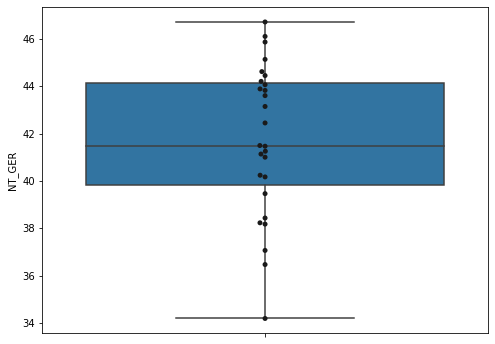

In [56]:
plt.figure(figsize=(8,6))

sns.boxplot(y=agg_uf['NT_GER'])
sns.swarmplot(y=agg_uf['NT_GER'], data=agg_uf, color=".1")

<AxesSubplot:xlabel='CO_UF_CURSO', ylabel='NT_GER'>

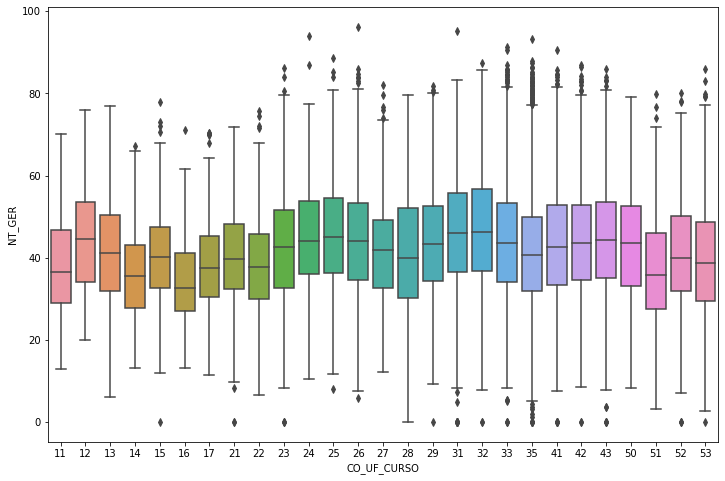

In [57]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='CO_UF_CURSO')

REGIÃO

In [58]:
len(df.CO_REGIAO_CURSO.unique())

5

In [59]:
df.CO_REGIAO_CURSO.value_counts()

3    26991
4     8856
2     8167
5     3980
1     3018
Name: CO_REGIAO_CURSO, dtype: int64

In [60]:
dict_reg = {1 : 'Norte',
            2 : 'Nordeste',
            3 : 'Sudeste',
            4 : 'Sul',
            5 : 'Centro-Oeste'
            }

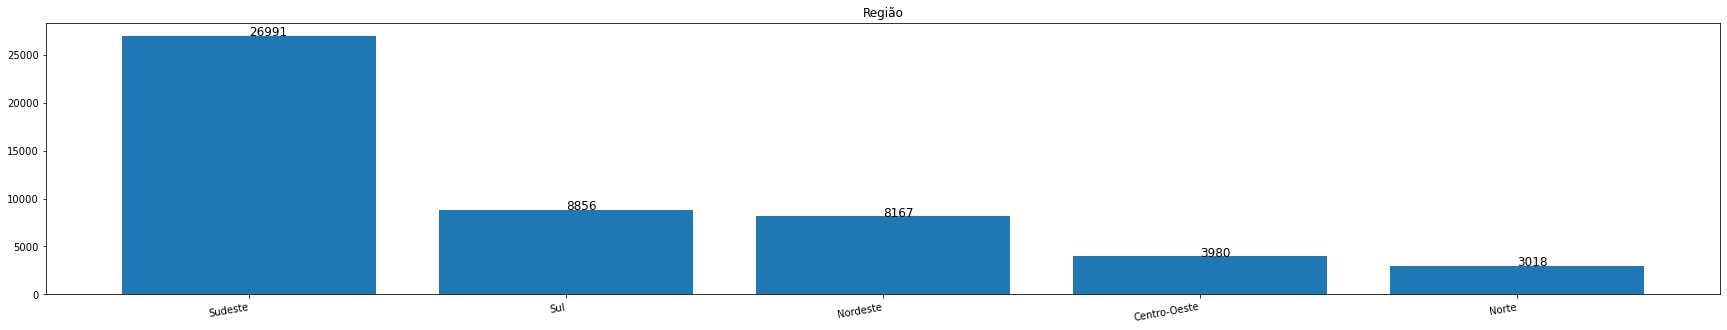

In [61]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_reg[x] for x in list(df.CO_REGIAO_CURSO.value_counts().index)], df.CO_REGIAO_CURSO.value_counts())
for index in df.CO_REGIAO_CURSO.value_counts().index:
    plt.text([dict_reg[x] for x in dict_reg][index-1], df.CO_REGIAO_CURSO.value_counts()[index], df.CO_REGIAO_CURSO.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Região')
ax = ax

Relação nota por região

In [62]:
agg_reg = df.groupby(['CO_REGIAO_CURSO']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False).rename(index=dict_reg)
agg_reg

,NT_GER
CO_REGIAO_CURSO,
Sul,43.865827
Nordeste,42.942886
Sudeste,42.793097
Centro-Oeste,40.076745
Norte,39.943576


<AxesSubplot:ylabel='NT_GER'>

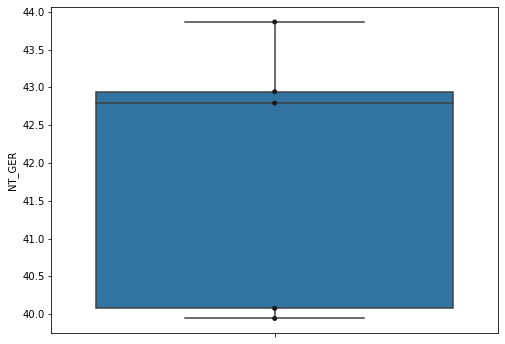

In [63]:
plt.figure(figsize=(8,6))

sns.boxplot(y=agg_reg['NT_GER'])
sns.swarmplot(y=agg_reg['NT_GER'], data=agg_reg, color=".1")

<AxesSubplot:xlabel='CO_REGIAO_CURSO', ylabel='NT_GER'>

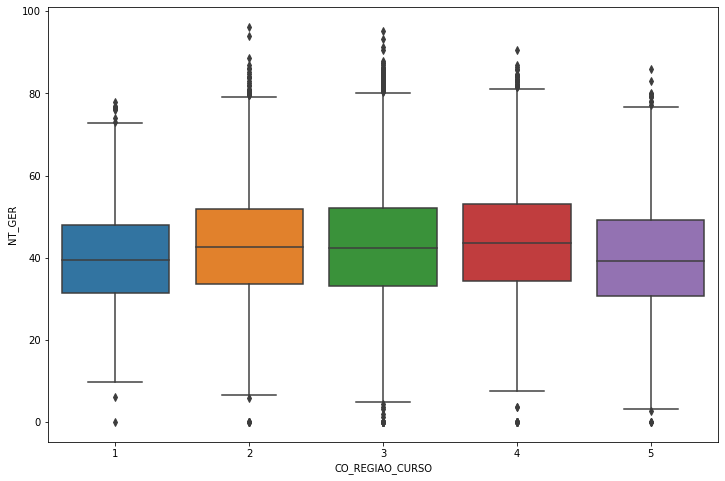

In [64]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='CO_REGIAO_CURSO')

## Tempo entre ensino médio e graduação

In [65]:
df['DELTA_MEDIO_GRADUACAO'] = df['ANO_IN_GRAD'] - df['ANO_FIM_EM']

In [66]:
df['DELTA_MEDIO_GRADUACAO'].unique()

array([ 0.,  2.,  6.,  1.,  3.,  5.,  4., 17.,  9., 11., 10.,  7., 16.,
        8., 12., 15., 14., 18., 13., 24., 19., 20., 25., 23., 26., 32.,
       27., 22., 21., 31., 33., -1., 28., 30., 29., 38., 35., 37., 34.,
       36., 39., 42., 40., 43., 47., 41., 53.])

In [67]:
df['DELTA_MEDIO_GRADUACAO'].value_counts()

 1.0     17099
 2.0      6372
 3.0      4386
 4.0      3423
 5.0      2779
 6.0      2313
 7.0      1920
 8.0      1659
 9.0      1545
 10.0     1344
 11.0     1207
 12.0      996
 0.0       892
 13.0      861
 14.0      768
 15.0      648
 16.0      543
 17.0      432
 18.0      308
 19.0      265
 20.0      207
 21.0      169
 22.0      136
 23.0      128
 24.0      107
 25.0       86
 26.0       72
 27.0       58
 28.0       45
 29.0       40
 30.0       38
 34.0       33
 31.0       32
 33.0       22
 32.0       21
 35.0       16
 36.0       13
 38.0        8
 39.0        5
 37.0        4
 42.0        3
 43.0        3
 40.0        2
-1.0         1
 47.0        1
 41.0        1
 53.0        1
Name: DELTA_MEDIO_GRADUACAO, dtype: int64

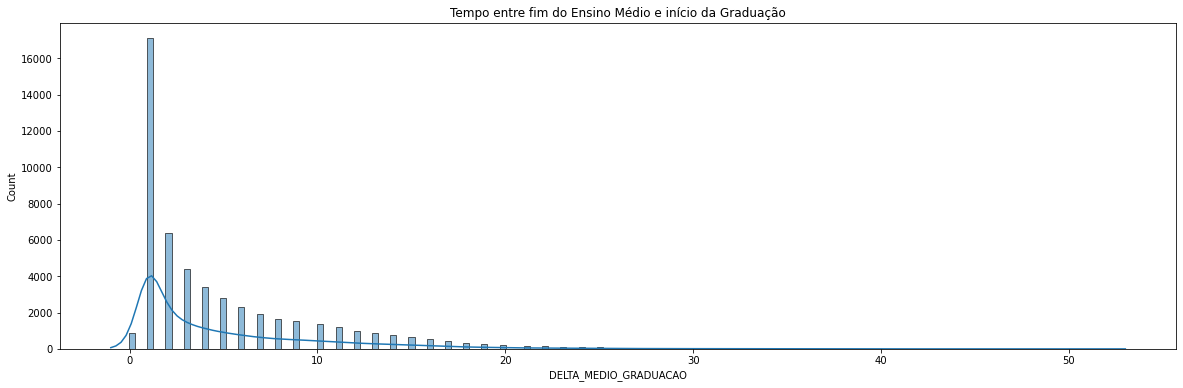

In [68]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df, x="DELTA_MEDIO_GRADUACAO", kde=True)

plt.title('Tempo entre fim do Ensino Médio e início da Graduação')
ax = ax

In [69]:
agg_delta = df.groupby(['DELTA_MEDIO_GRADUACAO']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_delta

,NT_GER
DELTA_MEDIO_GRADUACAO,
-1.0,51.800000
40.0,50.600000
43.0,48.300000
38.0,46.966667
37.0,46.650000
27.0,46.248780
28.0,46.097222
33.0,44.160000
29.0,44.075000


<AxesSubplot:xlabel='DELTA_MEDIO_GRADUACAO', ylabel='NT_GER'>

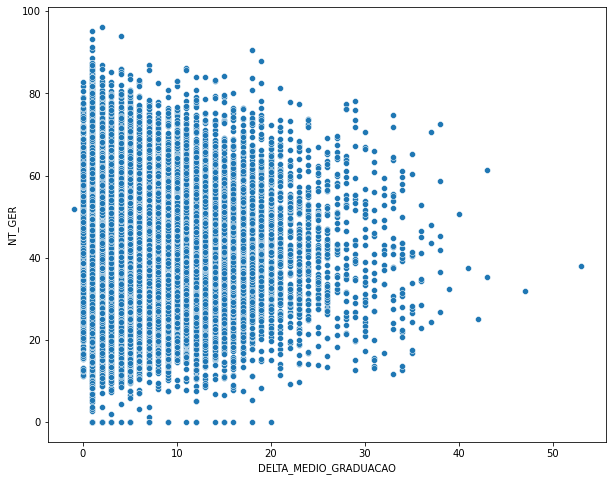

In [70]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df, x="DELTA_MEDIO_GRADUACAO", y="NT_GER")

## Distribuição Notas

NT_GER

In [71]:
df.NT_GER.isna().sum()

10458

In [72]:
max([x for x in df.NT_GER.unique() if str(x) != 'nan'])

96.2

In [73]:
min([x for x in df.NT_GER.unique() if str(x) != 'nan'])

0.0

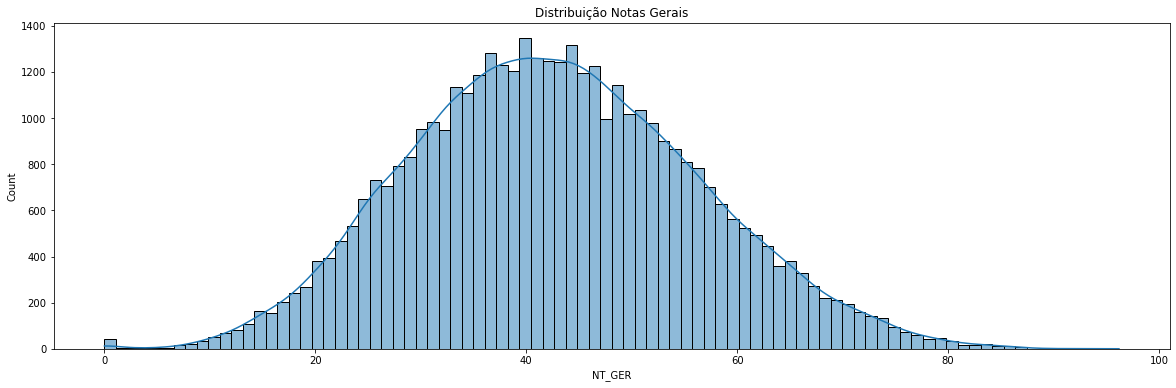

In [74]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df, x="NT_GER", kde=True)

plt.title('Distribuição Notas Gerais')
ax = ax

NT_FG

In [75]:
max([x for x in df.NT_FG.unique() if str(x) != 'nan'])

98.8

In [76]:
min([x for x in df.NT_FG.unique() if str(x) != 'nan'])

0.0

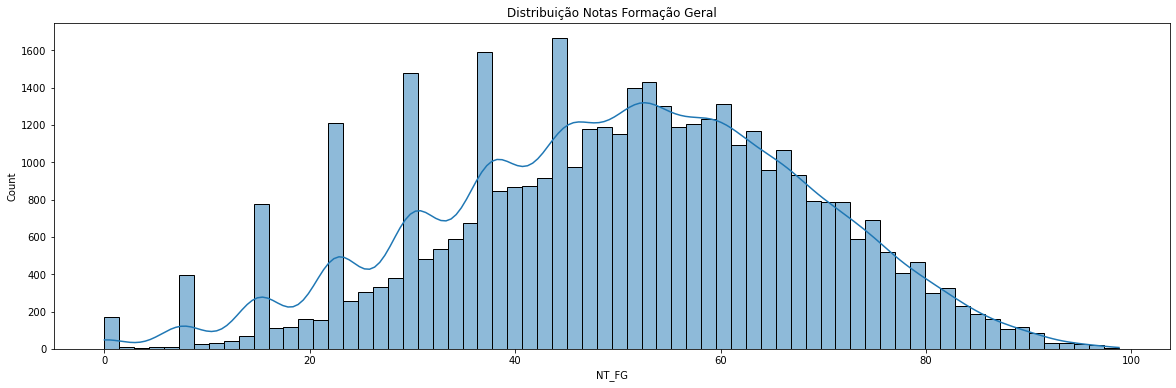

In [77]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df, x="NT_FG", kde=True)

plt.title('Distribuição Notas Formação Geral')
ax = ax

NT_OBJ_FG

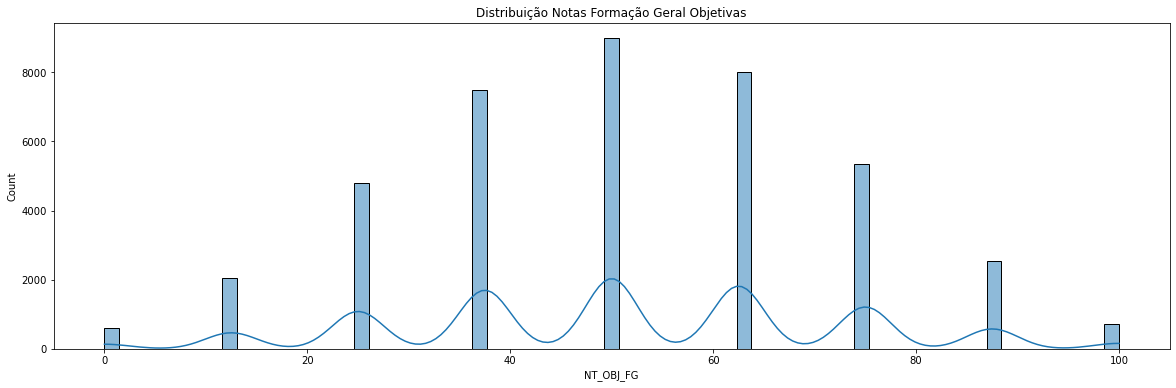

In [78]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df, x="NT_OBJ_FG", kde=True)

plt.title('Distribuição Notas Formação Geral Objetivas')
ax = ax

NT_DIS_FG

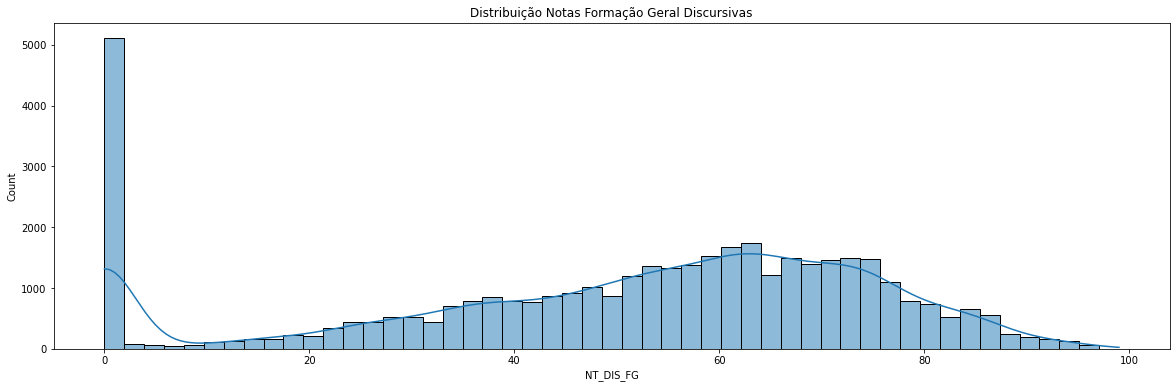

In [79]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df, x="NT_DIS_FG", kde=True)

plt.title('Distribuição Notas Formação Geral Discursivas')
ax = ax

## Sexo

In [80]:
df.TP_SEXO.value_counts()

M    43840
F     7172
Name: TP_SEXO, dtype: int64

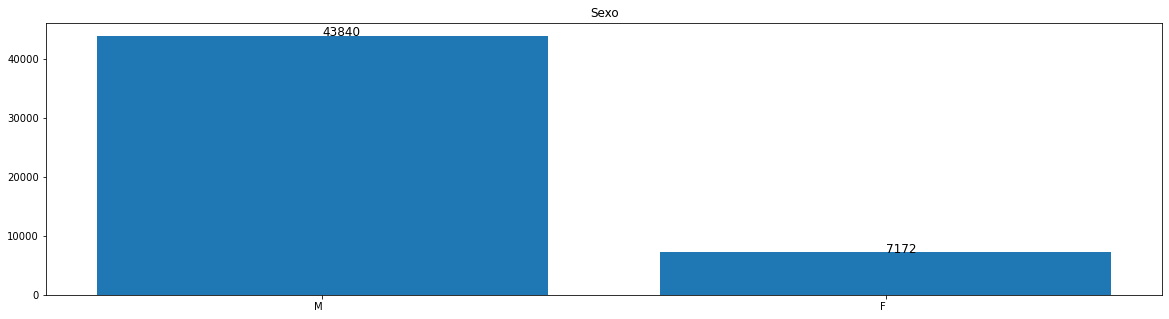

In [81]:
plt.figure(figsize=(20,5))
ax = plt.bar(df.TP_SEXO.value_counts().index, df.TP_SEXO.value_counts())
for index in range(len(df.TP_SEXO.value_counts().index)):
    plt.text(df.TP_SEXO.value_counts().index[index], df.TP_SEXO.value_counts()[index], df.TP_SEXO.value_counts()[index], size=12)


plt.xticks(rotation=0, ha='right')
plt.title('Sexo')
ax = ax

In [82]:
agg_sex = df.groupby(['TP_SEXO']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_sex

,NT_GER
TP_SEXO,
M,42.852879
F,41.436536


<AxesSubplot:xlabel='TP_SEXO', ylabel='NT_GER'>

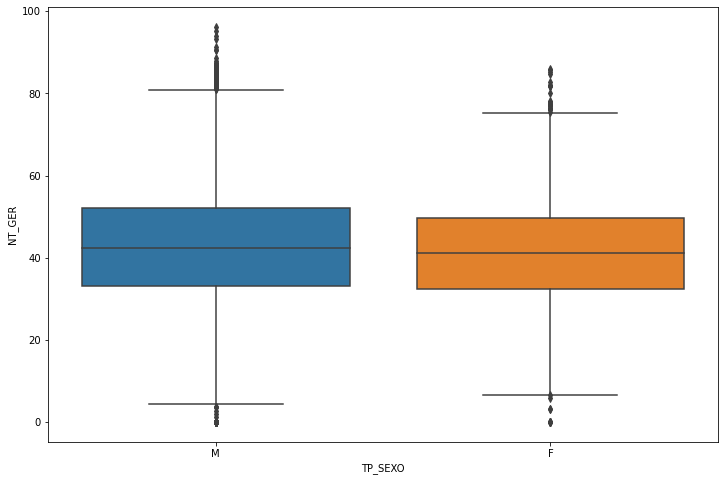

In [83]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='TP_SEXO')

## Idade

In [84]:
df.NU_IDADE.value_counts()

22    5622
23    5283
24    4874
21    4467
25    4051
26    3511
27    2928
28    2627
29    2161
30    1722
20    1666
31    1649
32    1390
33    1156
34    1060
35    1041
36     914
37     659
38     611
40     463
39     461
19     370
41     337
42     319
43     252
44     222
45     213
46     153
48     125
47     121
49     109
50      84
51      54
52      53
54      51
53      41
55      36
57      30
56      30
18      25
58      17
59      13
62       7
60       7
61       7
63       6
66       4
64       4
65       2
69       1
17       1
73       1
84       1
Name: NU_IDADE, dtype: int64

In [85]:
len(df.NU_IDADE.unique())

53

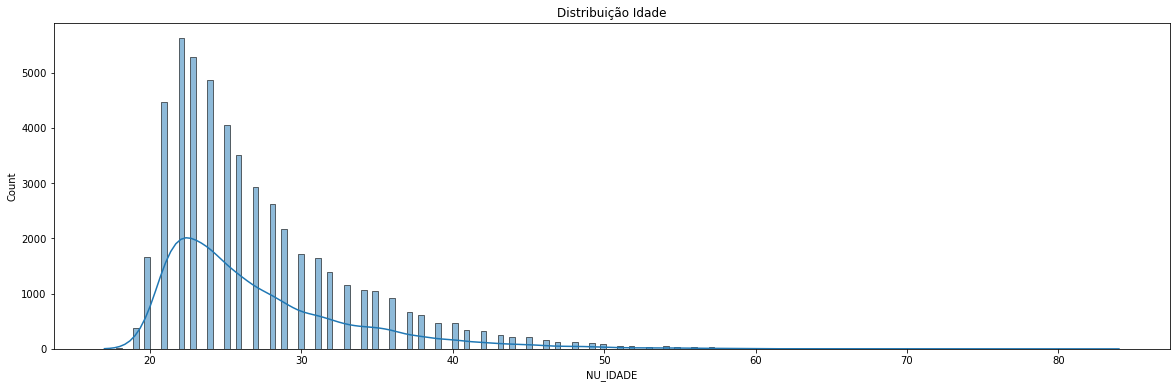

In [86]:
plt.figure(figsize=(20,6))

ax = sns.histplot(data=df, x="NU_IDADE", kde=True)

plt.title('Distribuição Idade')
ax = ax

<AxesSubplot:xlabel='NU_IDADE', ylabel='NT_GER'>

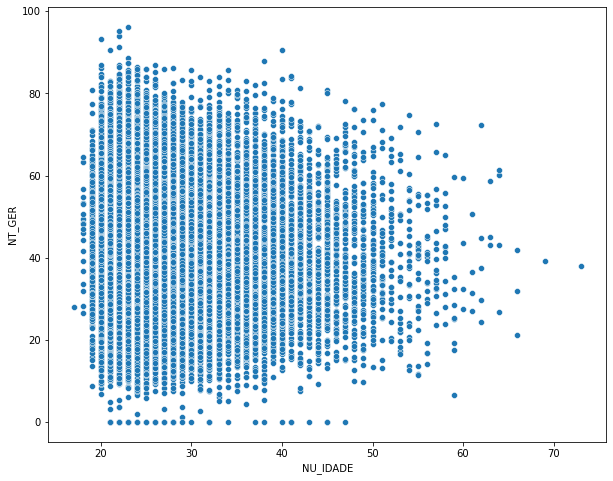

In [87]:
plt.figure(figsize=(10,8))

sns.scatterplot(data=df, x="NU_IDADE", y="NT_GER")

## Estado Civil

In [88]:
df.QE_I01.value_counts()

A    33801
B     7400
E     1144
C      693
D       33
Name: QE_I01, dtype: int64

In [89]:
dict_QE_I01 = {'A': 'Solteiro(a)',
               'B': 'Casado(a)',
               'C': 'Separado(a) judicialmente/divorciado(a)',
               'D': 'Viúvo(a)',
               'E': 'Outro'
              }

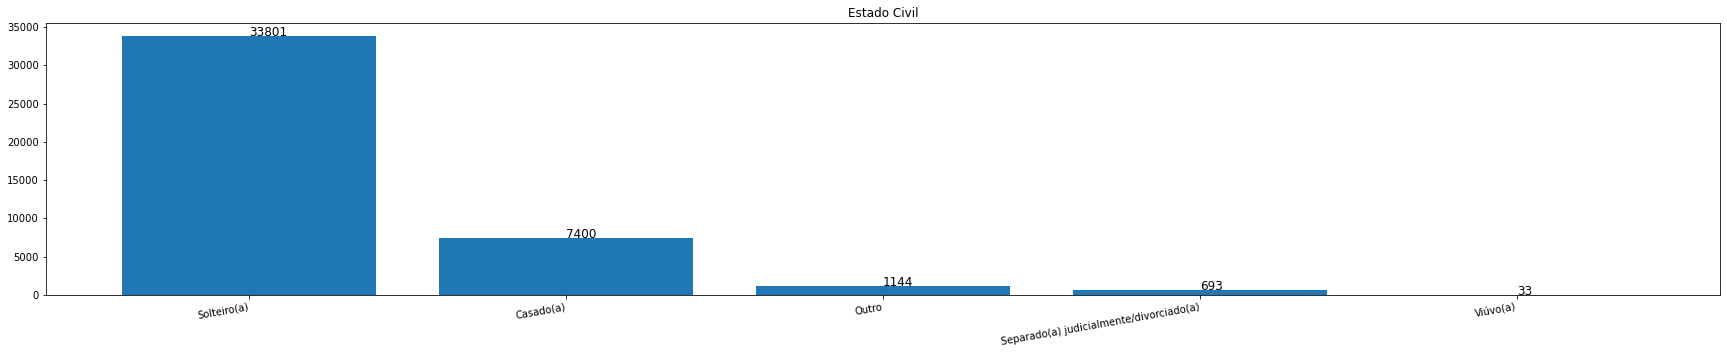

In [90]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I01[x] for x in  list(df.QE_I01.value_counts().index)], df.QE_I01.value_counts())
for index in range(len(df.QE_I01.value_counts().index)):
    plt.text([dict_QE_I01[x] for x in  list(df.QE_I01.value_counts().index)][index], df.QE_I01.value_counts()[index], df.QE_I01.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Estado Civil')
ax = ax

In [91]:
agg_civ = df.groupby(['QE_I01']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_civ

,NT_GER
QE_I01,
A,43.111878
C,41.731774
E,41.545222
B,41.052389
D,37.430303


<AxesSubplot:xlabel='QE_I01', ylabel='NT_GER'>

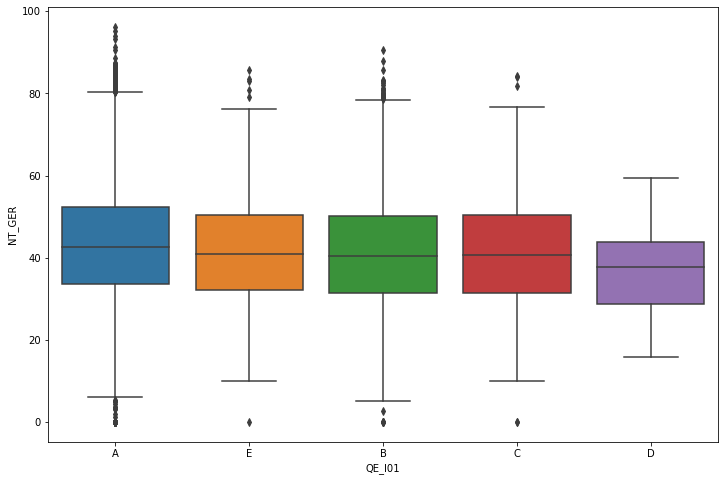

In [92]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I01')

## Raça 

- QE_I02

In [93]:
df.QE_I02.value_counts()

A    24165
D    12717
B     3458
F     1379
C     1194
E      158
Name: QE_I02, dtype: int64

In [94]:
dict_QE_I02 = {'A': 'Branca',
               'B': 'Preta',
               'C': 'Amarela',
               'D': 'Parda',
               'E': 'Indígena',
               'F': 'Não quero declarar'
              }

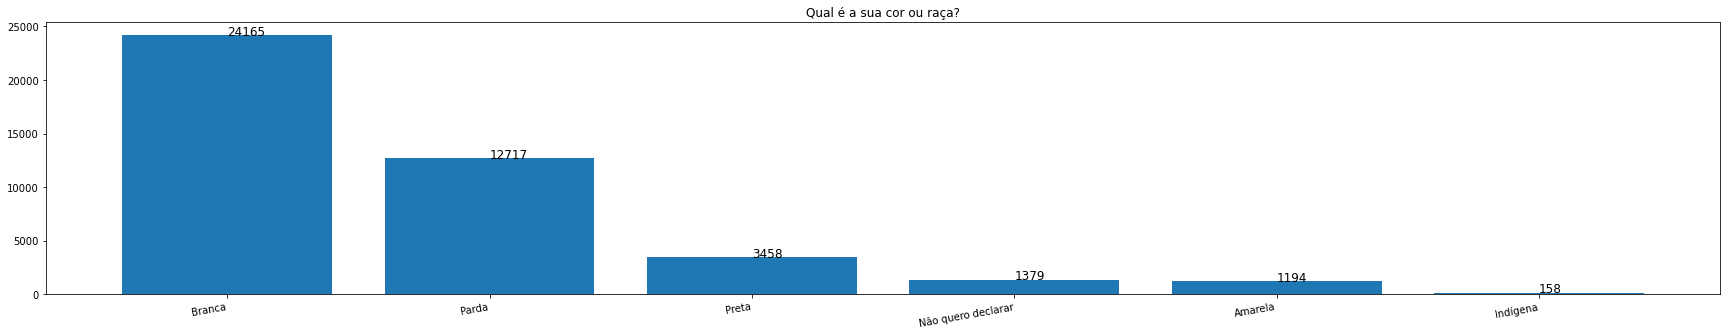

In [95]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I02[x] for x in  list(df.QE_I02.value_counts().index)], df.QE_I02.value_counts())
for index in range(len(df.QE_I02.value_counts().index)):
    plt.text([dict_QE_I02[x] for x in  list(df.QE_I02.value_counts().index)][index], df.QE_I02.value_counts()[index], df.QE_I02.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Qual é a sua cor ou raça?')
ax = ax

In [96]:
agg_raca = df.groupby(['QE_I02']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_raca

,NT_GER
QE_I02,
F,44.939922
A,43.561449
C,42.413297
D,41.540427
B,40.369327
E,36.864865


<AxesSubplot:xlabel='QE_I02', ylabel='NT_GER'>

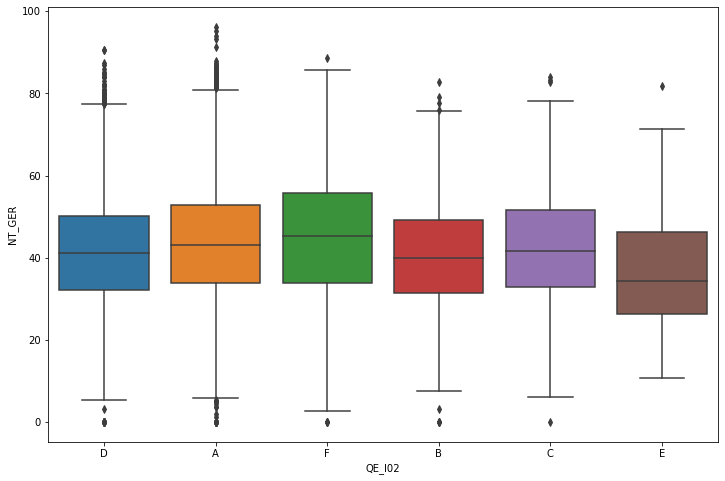

In [97]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I02')

## Nacionalidade

In [98]:
df.QE_I03.value_counts()

A    42589
B      337
C      145
Name: QE_I03, dtype: int64

In [99]:
dict_QE_I03 = {'A': 'Brasileira',
               'B': 'Brasileira naturalizada',
               'C': 'Estrangeira'
              }

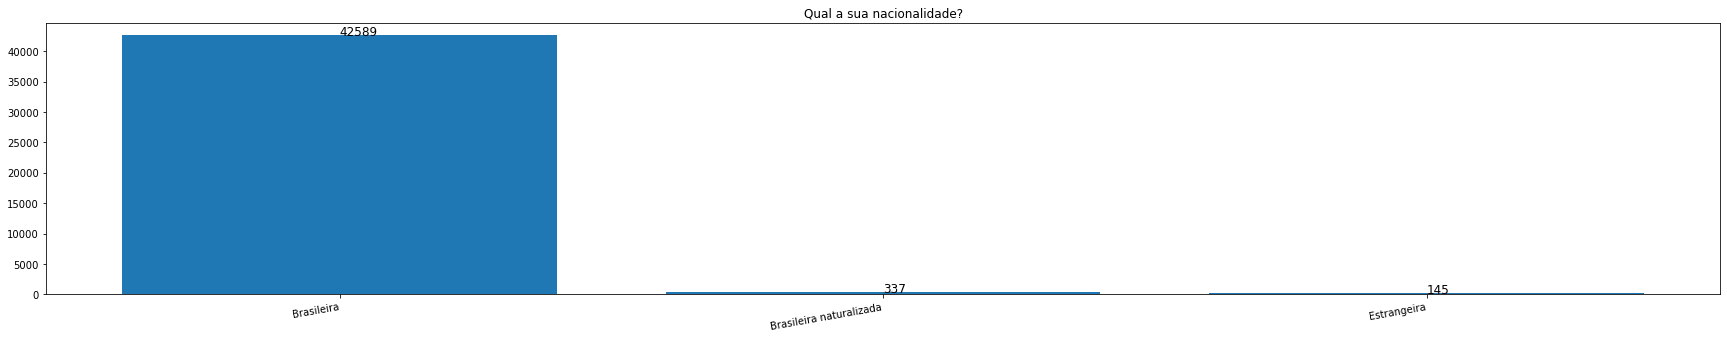

In [100]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I03[x] for x in  list(df.QE_I03.value_counts().index)], df.QE_I03.value_counts())
for index in range(len(df.QE_I03.value_counts().index)):
    plt.text([dict_QE_I03[x] for x in  list(df.QE_I03.value_counts().index)][index], df.QE_I03.value_counts()[index], df.QE_I03.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Qual a sua nacionalidade?')
ax = ax

In [101]:
agg_nac = df.groupby(['QE_I03']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_nac

,NT_GER
QE_I03,
A,42.763274
B,37.771203
C,35.911278


<AxesSubplot:xlabel='QE_I03', ylabel='NT_GER'>

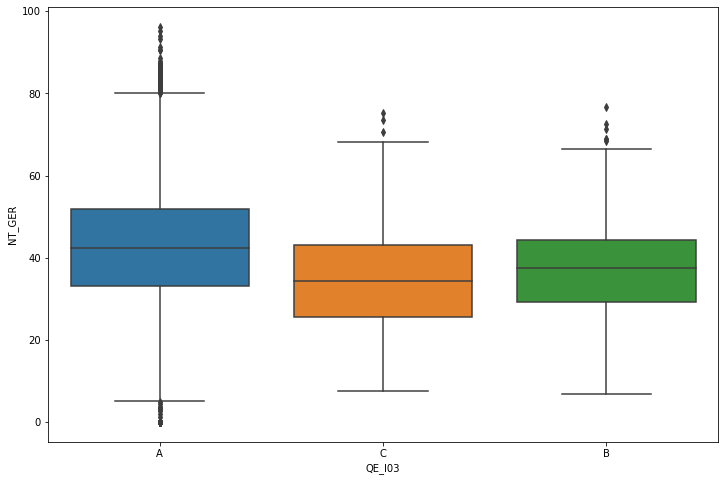

In [102]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I03')

## Escolarização Pai

- QE_I04

In [103]:
df.QE_I04.value_counts()

D    16201
B     8761
E     7261
C     6779
F     2413
A     1656
Name: QE_I04, dtype: int64

In [104]:
dict_QE_I04 = {'A': 'Nenhuma',
               'B': 'Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série)',
               'C': 'Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série)',
               'D': 'Ensino Médio',
               'E': 'Ensino Superior - Graduação',
               'F': 'Pós-graduação'
              }

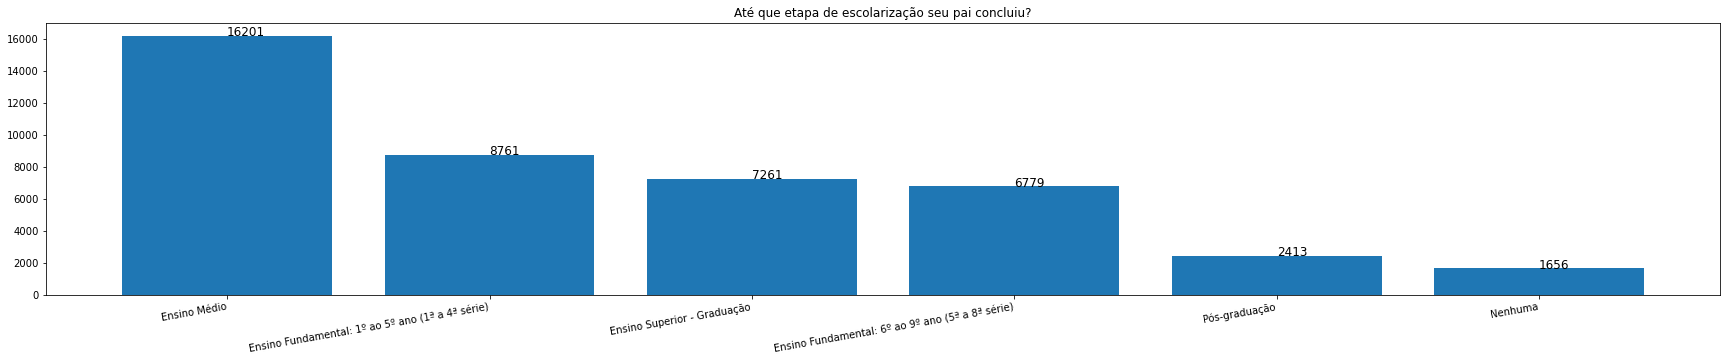

In [105]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I04[x] for x in  list(df.QE_I04.value_counts().index)], df.QE_I04.value_counts())
for index in range(len(df.QE_I04.value_counts().index)):
    plt.text([dict_QE_I04[x] for x in  list(df.QE_I04.value_counts().index)][index], df.QE_I04.value_counts()[index], df.QE_I04.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Até que etapa de escolarização seu pai concluiu?')
ax = ax

In [106]:
agg_esc_pai = df.groupby(['QE_I04']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_esc_pai

,NT_GER
QE_I04,
F,46.604143
E,45.192328
D,42.644239
C,41.766321
B,40.912391
A,39.862581


<AxesSubplot:xlabel='QE_I04', ylabel='NT_GER'>

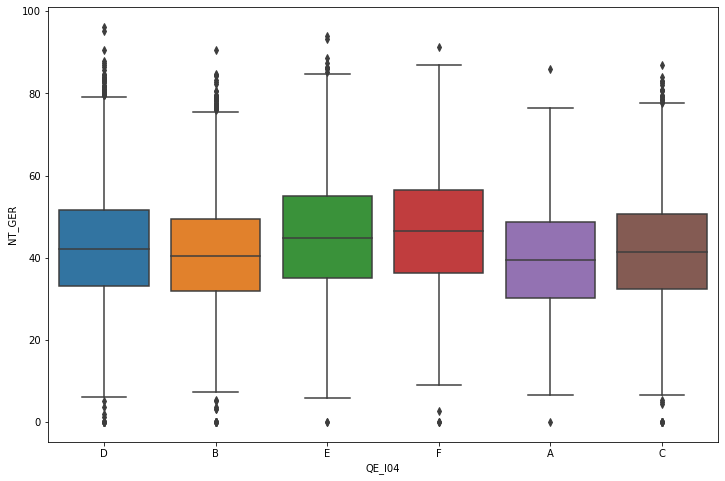

In [107]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I04')

## Escolarização Mãe

- QE_I05

In [108]:
df.QE_I05.value_counts()

D    16744
E     7783
B     7073
C     6700
F     3930
A      841
Name: QE_I05, dtype: int64

In [109]:
dict_QE_I05 = {'A': 'Nenhuma',
               'B': 'Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série)',
               'C': 'Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série)',
               'D': 'Ensino Médio',
               'E': 'Ensino Superior - Graduação',
               'F': 'Pós-graduação'
              }

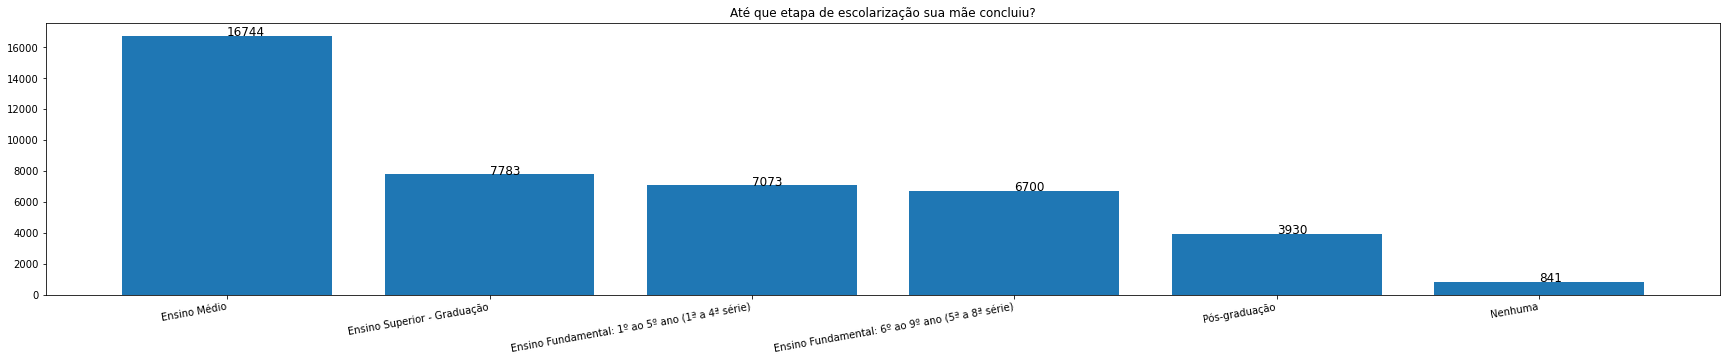

In [110]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I05[x] for x in  list(df.QE_I05.value_counts().index)], df.QE_I05.value_counts())
for index in range(len(df.QE_I05.value_counts().index)):
    plt.text([dict_QE_I05[x] for x in  list(df.QE_I05.value_counts().index)][index], df.QE_I05.value_counts()[index], df.QE_I05.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Até que etapa de escolarização sua mãe concluiu?')
ax = ax

In [111]:
agg_esc_mae = df.groupby(['QE_I05']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_esc_mae

,NT_GER
QE_I05,
F,45.297029
E,44.752787
D,42.678283
C,41.505280
B,40.593819
A,39.132645


<AxesSubplot:xlabel='QE_I05', ylabel='NT_GER'>

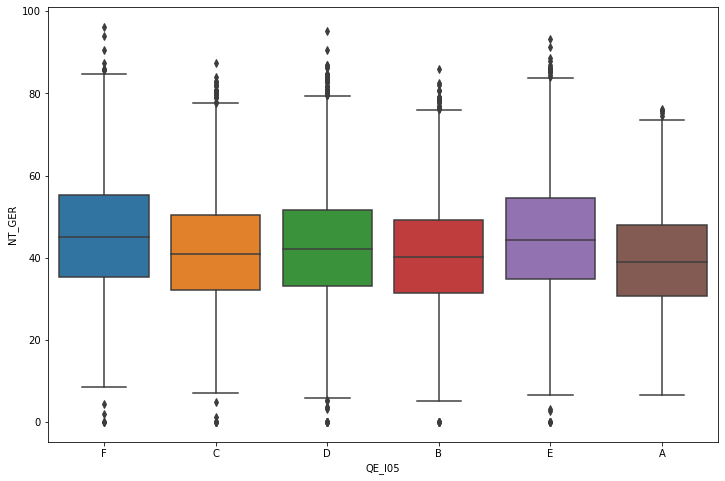

In [112]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I05')

## Moradia Atual

- QE_I06

In [113]:
df.QE_I06.value_counts()

B    27114
C     9546
A     3476
D     2551
F      278
E      106
Name: QE_I06, dtype: int64

In [114]:
dict_QE_I06 = {'A': 'Em casa ou apartamento, sozinho',
               'B': 'Em casa ou apartamento, com pais e/ou parentes',
               'C': 'Em casa ou apartamento, com cônjuge e/ou filhos',
               'D': 'Em casa ou apartamento, com outras pessoas (incluindo república)',
               'E': 'Em alojamento universitário da própria instituição',
               'F': 'Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)'
              }

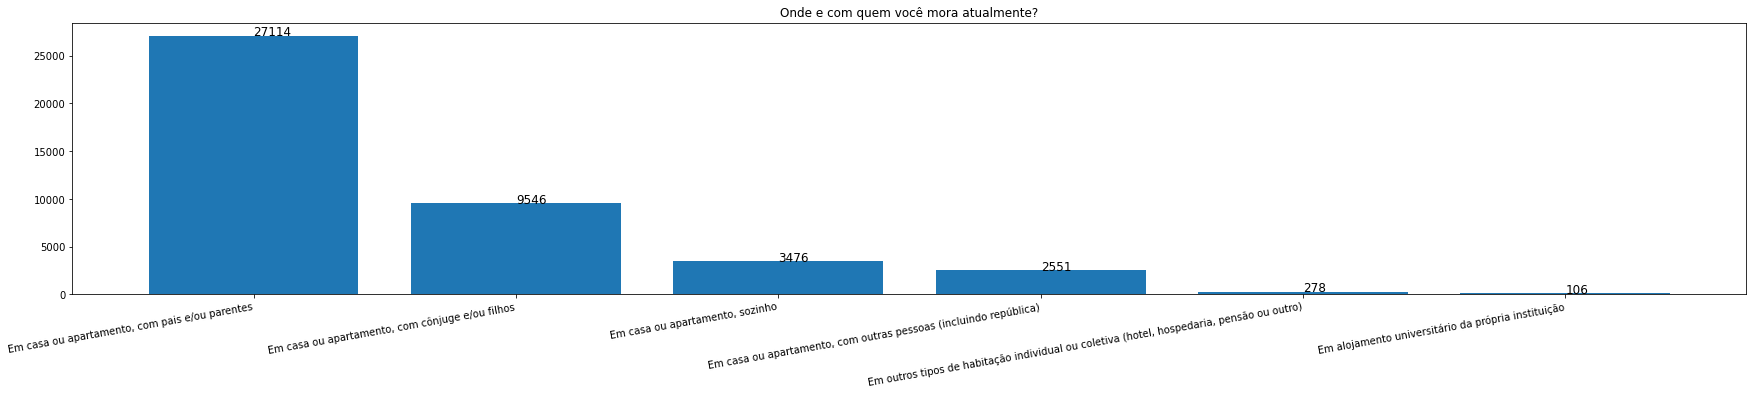

In [115]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I06[x] for x in list(df.QE_I06.value_counts().index)], df.QE_I06.value_counts())
for index in range(len(df.QE_I06.value_counts().index)):
    plt.text([dict_QE_I06[x] for x in list(df.QE_I06.value_counts().index)][index], df.QE_I06.value_counts()[index], df.QE_I06.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Onde e com quem você mora atualmente?')
ax = ax

In [116]:
agg_moradia = df.groupby(['QE_I06']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_moradia

,NT_GER
QE_I06,
D,46.802689
E,46.645631
A,43.090662
F,42.979231
B,42.740089
C,41.246807


<AxesSubplot:xlabel='QE_I06', ylabel='NT_GER'>

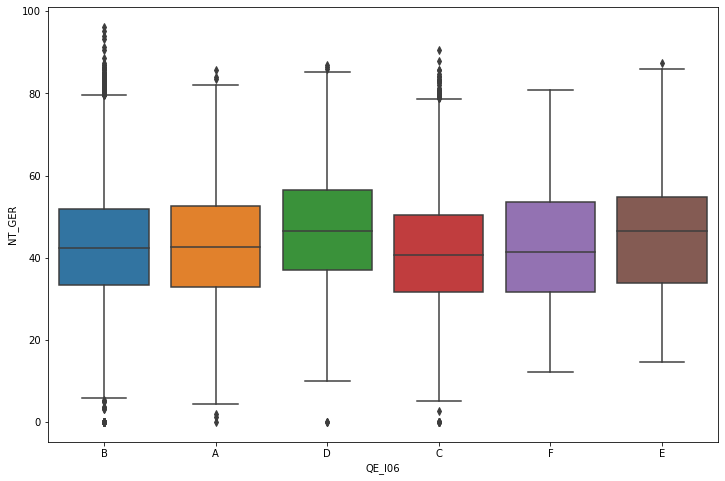

In [117]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I06')

## Integrantes Família

- QE_I07

In [118]:
df.QE_I07.value_counts()

D    10909
C    10260
B     7317
E     5651
A     5201
F     2322
G      808
H      603
Name: QE_I07, dtype: int64

In [119]:
dict_QE_I07 = {'A': 'Nenhuma',
               'B': 'Uma',
               'C': 'Duas',
               'D': 'Três',
               'E': 'Quatro',
               'F': 'Cinco',
               'G': 'Seis',
               'H': 'Sete ou mais'
              }

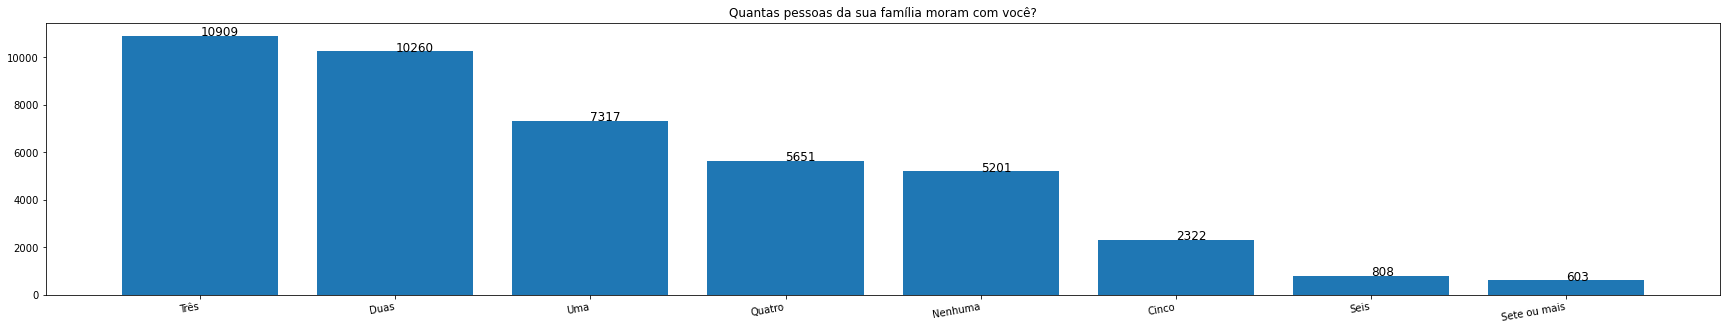

In [120]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I07[x] for x in list(df.QE_I07.value_counts().index)], df.QE_I07.value_counts())
for index in range(len(df.QE_I07.value_counts().index)):
    plt.text([dict_QE_I07[x] for x in list(df.QE_I07.value_counts().index)][index], df.QE_I07.value_counts()[index], df.QE_I07.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Quantas pessoas da sua família moram com você?')
ax = ax

In [121]:
agg_integrantes = df.groupby(['QE_I07']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_integrantes

,NT_GER
QE_I07,
A,45.068253
B,42.927663
D,42.846866
C,42.701241
E,41.449602
F,40.748273
G,40.100000
H,39.570504


<AxesSubplot:xlabel='QE_I07', ylabel='NT_GER'>

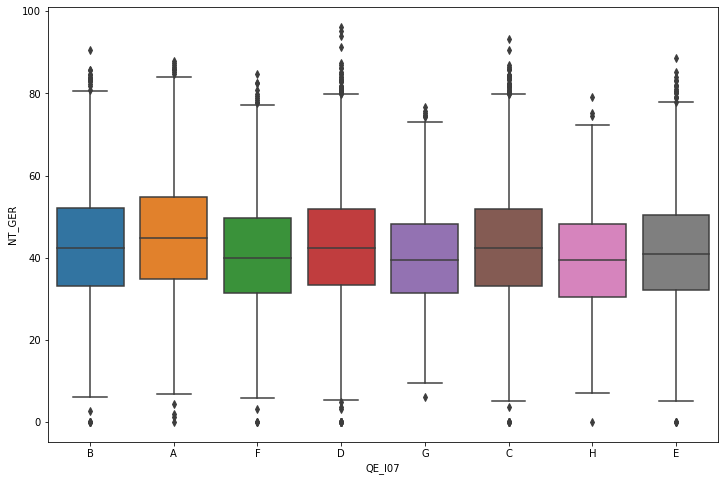

In [122]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I07')

## Renda Familiar

- QE_I08

In [123]:
df.QE_I08.value_counts()

B    11200
C    10380
E     6195
D     5860
A     5816
F     3333
G      287
Name: QE_I08, dtype: int64

In [124]:
dict_QE_I08 = {'A': 'Até 1,5 salário mínimo (até RS 1.650,00)',
               'B': 'De 1,5 a 3 salários mínimos (RS 1.650,01 a RS 3.300,00)',
               'C': 'De 3 a 4,5 salários mínimos (RS 3.300,01 a RS 4.950,00)',
               'D': 'De 4,5 a 6 salários mínimos (RS 4.950,01 a RS 6.600,00)',
               'E': 'De 6 a 10 salários mínimos (RS 6.600,01 a RS 11.000,00)',
               'F': 'De 10 a 30 salários mínimos (RS 11.000,01 a RS 33.000,00)',
               'G': 'Acima de 30 salários mínimos (mais de RS 33.000,00)'
              }

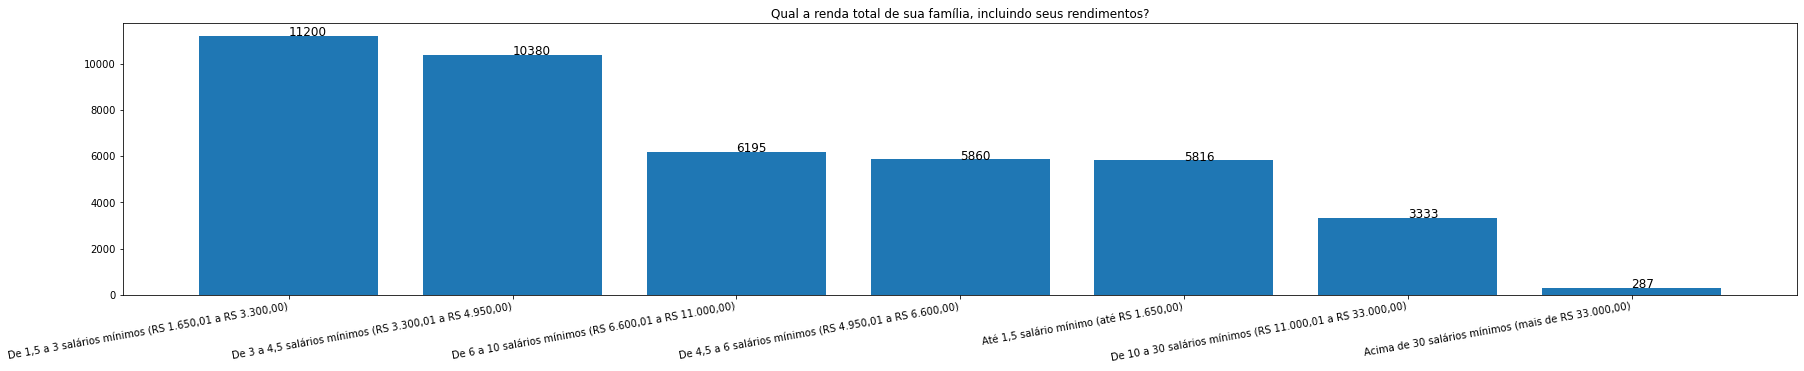

In [125]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I08[x] for x in list(df.QE_I08.value_counts().index)], df.QE_I08.value_counts())
for index in range(len(df.QE_I08.value_counts().index)):
    plt.text([dict_QE_I08[x] for x in list(df.QE_I08.value_counts().index)][index], df.QE_I08.value_counts()[index], df.QE_I08.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Qual a renda total de sua família, incluindo seus rendimentos?')
ax = ax

In [126]:
agg_renda = df.groupby(['QE_I08']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_renda

,NT_GER
QE_I08,
G,50.081923
F,48.699133
E,45.453369
D,43.840956
C,42.252192
B,40.973629
A,38.927187


<AxesSubplot:xlabel='QE_I08', ylabel='NT_GER'>

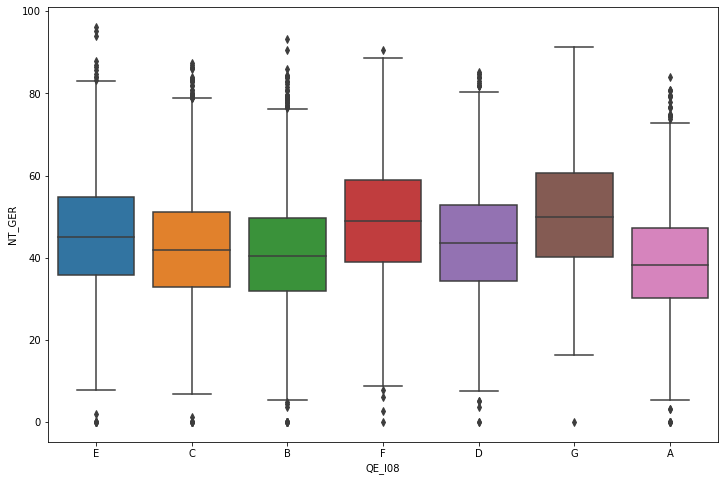

In [127]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I08')

## Situação Financeira

- QE_I09

In [128]:
df.QE_I09.value_counts()

C    12097
E     8751
B     7768
D     7714
F     5018
A     1723
Name: QE_I09, dtype: int64

In [129]:
dict_QE_I09 = {'A': 'Não tenho renda e meus gastos são financiados por programas governamentais',
               'B': 'Não tenho renda e meus gastos são financiados pela minha família ou por outras pessoas',
               'C': 'Tenho renda, mas recebo ajuda da família ou de outras pessoas para financiar meus gastos',
               'D': 'Tenho renda e não preciso de ajuda para financiar meus gastos',
               'E': 'Tenho renda e contribuo com o sustento da família',
               'F': 'Sou o principal responsável pelo sustento da família'
              }

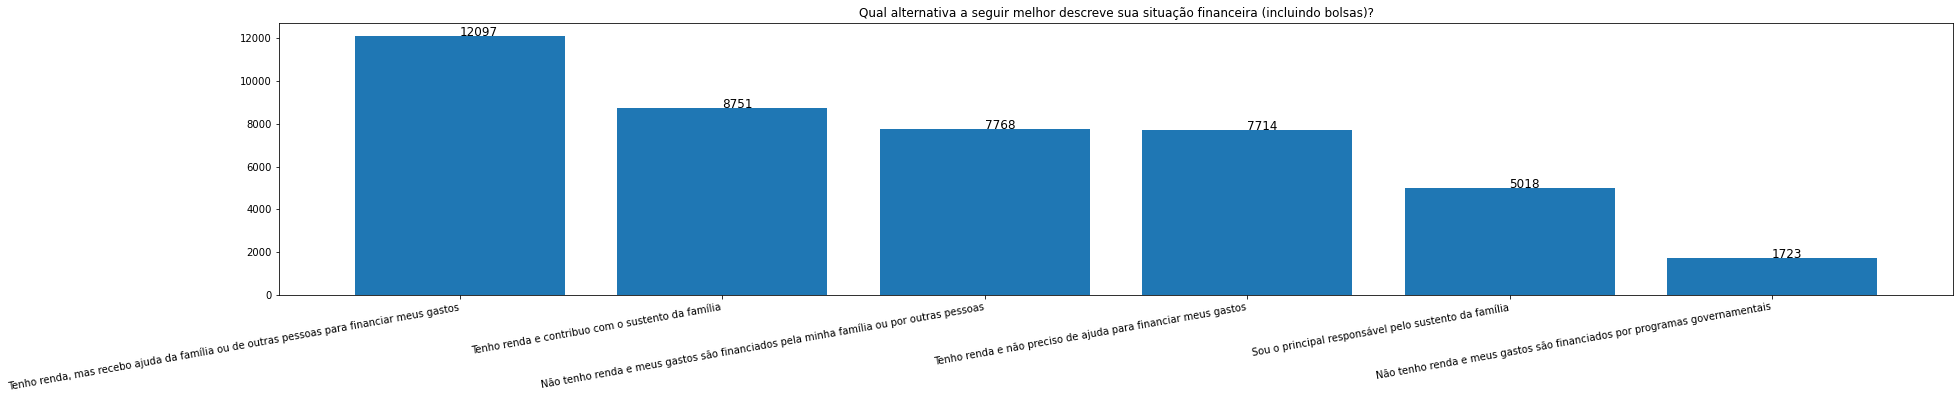

In [130]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I09[x] for x in list(df.QE_I09.value_counts().index)], df.QE_I09.value_counts())
for index in range(len(df.QE_I09.value_counts().index)):
    plt.text([dict_QE_I09[x] for x in list(df.QE_I09.value_counts().index)][index], df.QE_I09.value_counts()[index], df.QE_I09.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Qual alternativa a seguir melhor descreve sua situação financeira (incluindo bolsas)?')
ax = ax

In [131]:
agg_financ = df.groupby(['QE_I09']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_financ

,NT_GER
QE_I09,
C,43.440225
D,42.864402
B,42.809495
F,42.613364
E,41.670980
A,41.659340


<AxesSubplot:xlabel='QE_I09', ylabel='NT_GER'>

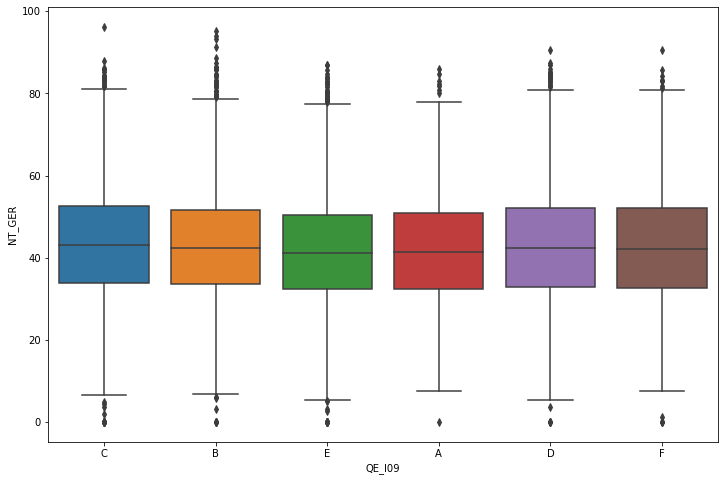

In [132]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I09')

## Horas Trabalhadas

- QE_I10

In [133]:
df.QE_I10.value_counts()

E    22655
A    11912
D     4614
B     2067
C     1823
Name: QE_I10, dtype: int64

In [134]:
dict_QE_I10 = {'A': 'Não estou trabalhando',
               'B': 'Trabalho eventualmente',
               'C': 'Trabalho até 20 horas semanais',
               'D': 'Trabalho de 21 a 39 horas semanais',
               'E': 'Trabalho 40 horas semanais ou mais'
              }

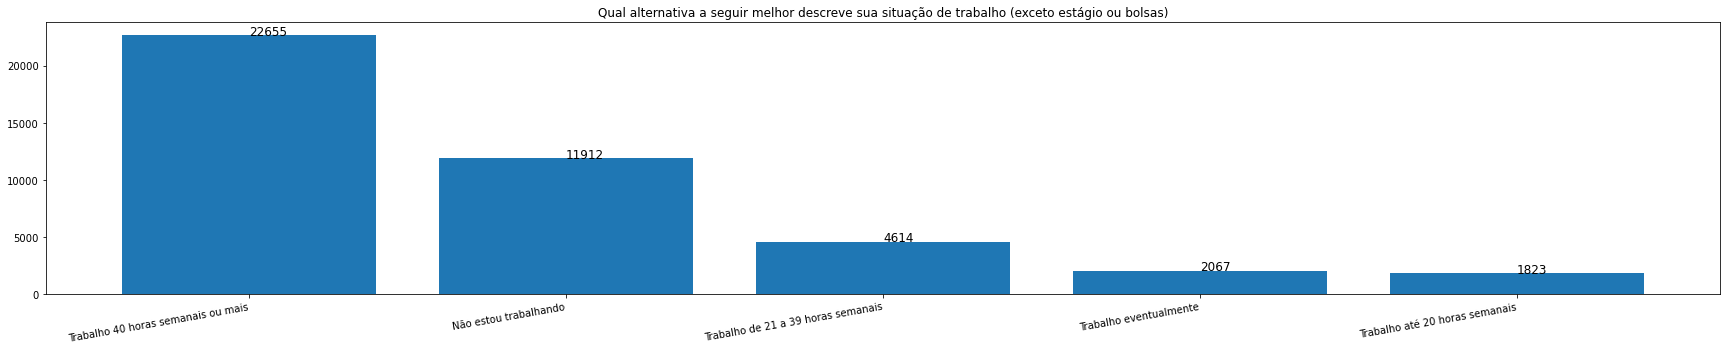

In [135]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I10[x] for x in list(df.QE_I10.value_counts().index)], df.QE_I10.value_counts())
for index in range(len(df.QE_I10.value_counts().index)):
    plt.text([dict_QE_I10[x] for x in list(df.QE_I10.value_counts().index)][index], df.QE_I10.value_counts()[index], df.QE_I10.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Qual alternativa a seguir melhor descreve sua situação de trabalho (exceto estágio ou bolsas)')
ax = ax

In [136]:
agg_trab = df.groupby(['QE_I10']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_trab

,NT_GER
QE_I10,
A,43.996902
D,43.428308
C,42.625399
E,41.949873
B,41.680637


<AxesSubplot:xlabel='QE_I10', ylabel='NT_GER'>

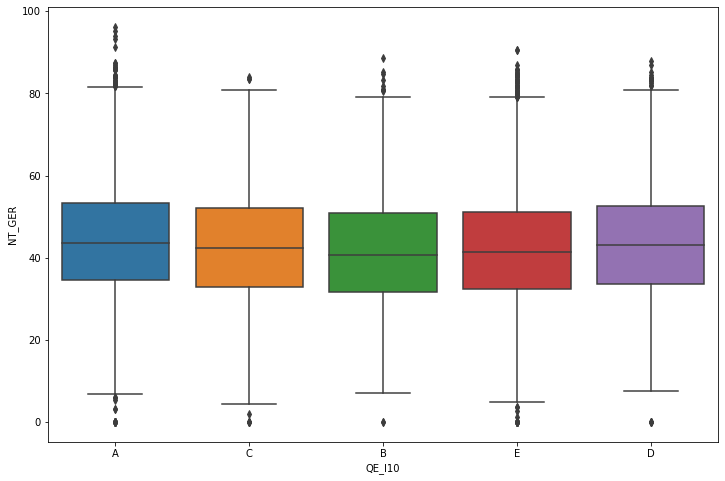

In [137]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I10')

## Bolsa de estudos

- QE_I11

In [138]:
df.QE_I11.value_counts()

A    14419
B    13053
E     4957
H     3312
C     3229
I     1181
D      850
G      842
J      532
F      484
K      212
Name: QE_I11, dtype: int64

In [139]:
dict_QE_I11 = {'A': 'Nenhum, pois meu curso é gratuito',
               'B': 'Nenhum, embora meu curso não seja gratuito',
               'C': 'ProUni integral',
               'D': 'ProUni parcial, apenas',
               'E': 'FIES, apenas',
               'F': 'ProUni Parcial e FIES',
               'G': 'Bolsa oferecida por governo estadual, distrital ou municipal.',
               'H': 'Bolsa oferecida pela própria instituição',
               'I': 'Bolsa oferecida por outra entidade (empresa, ONG, outra)',
               'J': 'Financiamento oferecido pela própria instituição',
               'K': 'Financiamento bancário'
              }

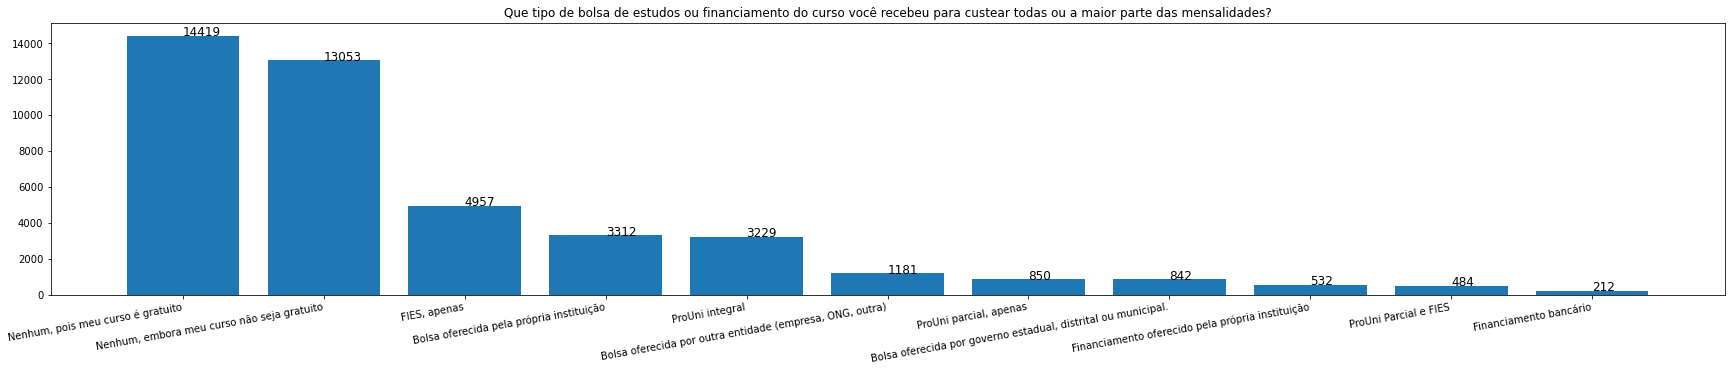

In [140]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I11[x] for x in list(df.QE_I11.value_counts().index)], df.QE_I11.value_counts())
for index in range(len(df.QE_I11.value_counts().index)):
    plt.text([dict_QE_I11[x] for x in list(df.QE_I11.value_counts().index)][index], df.QE_I11.value_counts()[index], df.QE_I11.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Que tipo de bolsa de estudos ou financiamento do curso você recebeu para custear todas ou a maior parte das mensalidades?')
ax = ax

In [141]:
agg_bolsa = df.groupby(['QE_I11']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_bolsa

,NT_GER
QE_I11,
A,46.536418
C,44.987261
F,42.858405
D,42.413840
H,41.517534
B,40.362843
I,40.291041
G,39.785332
J,39.108333


<AxesSubplot:xlabel='QE_I11', ylabel='NT_GER'>

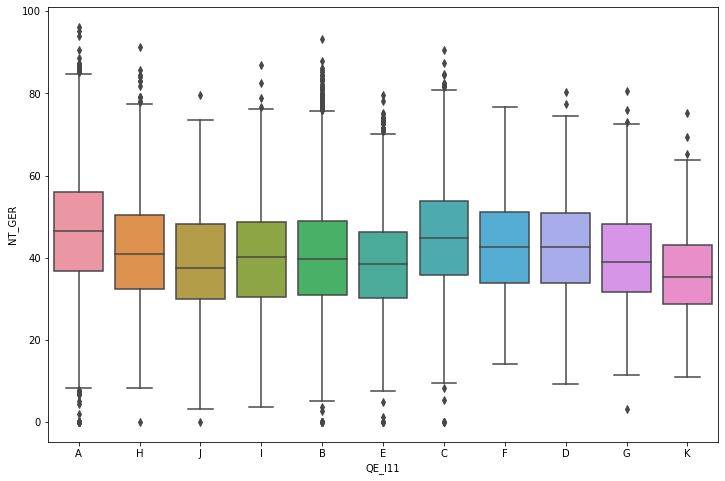

In [142]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I11')

## Auxílio permanência

In [143]:
df.QE_I12.value_counts()

A    39925
C      897
F      835
E      697
D      395
B      322
Name: QE_I12, dtype: int64

In [144]:
dict_QE_I12 = {'A': 'Nenhum',
               'B': 'Auxílio moradia',
               'C': 'Auxílio alimentação',
               'D': 'Auxílio moradia e alimentação',
               'E': 'Auxílio permanência',
               'F': 'Outro tipo de auxílio',
              }

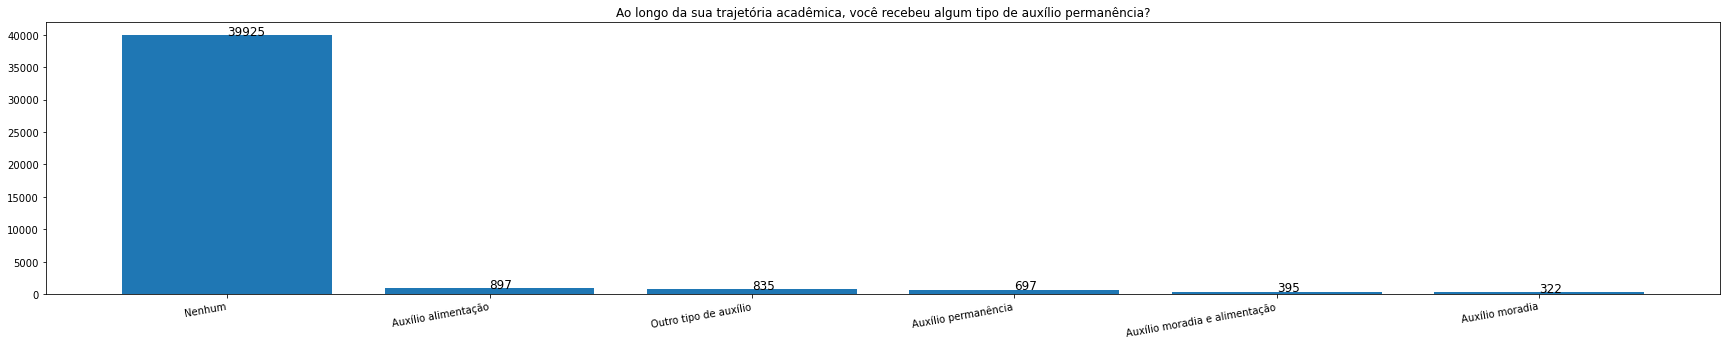

In [145]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I12[x] for x in list(df.QE_I12.value_counts().index)], df.QE_I12.value_counts())
for index in range(len(df.QE_I12.value_counts().index)):
    plt.text([dict_QE_I12[x] for x in list(df.QE_I12.value_counts().index)][index], df.QE_I12.value_counts()[index], df.QE_I12.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Ao longo da sua trajetória acadêmica, você recebeu algum tipo de auxílio permanência?')
ax = ax

In [146]:
agg_aux = df.groupby(['QE_I12']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_aux

,NT_GER
QE_I12,
D,48.251220
B,45.092053
E,44.853951
C,44.092462
A,42.561664
F,42.480538


<AxesSubplot:xlabel='QE_I12', ylabel='NT_GER'>

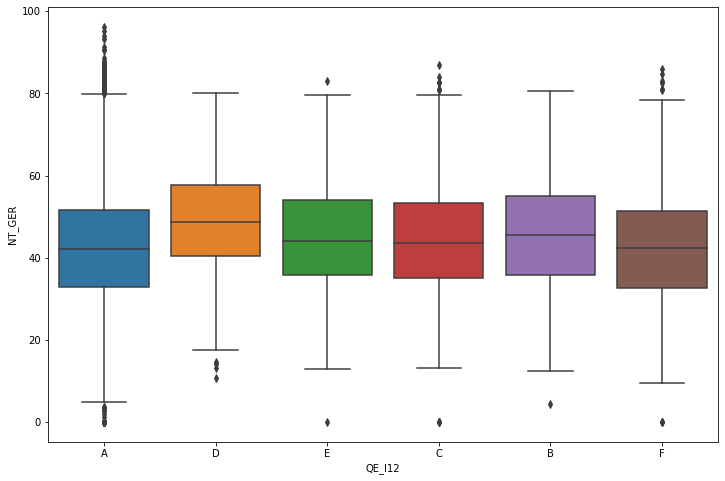

In [147]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I12')

## Auxílio Bolsa acadêmica

In [148]:
df.QE_I13.value_counts()

A    33745
B     3393
F     2944
D     1482
C     1169
E      338
Name: QE_I13, dtype: int64

In [149]:
dict_QE_I13 = {'A': 'Nenhum',
               'B': 'Bolsa de iniciação científica',
               'C': 'Bolsa de extensão',
               'D': 'Bolsa de monitoria/tutoria',
               'E': 'Bolsa PET',
               'F': 'Outro tipo de bolsa acadêmica',
              }

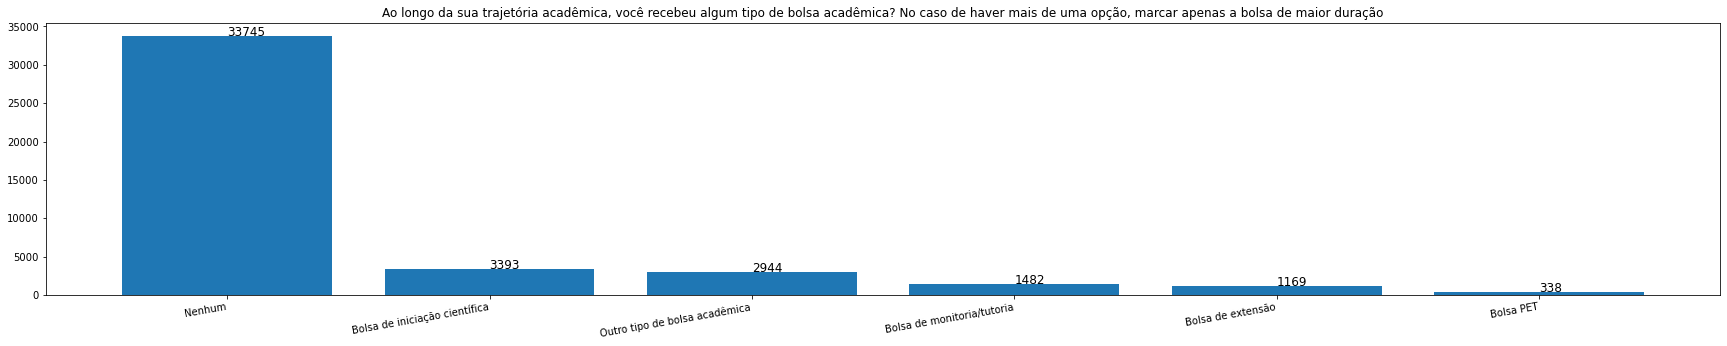

In [150]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I13[x] for x in list(df.QE_I13.value_counts().index)], df.QE_I13.value_counts())
for index in range(len(df.QE_I13.value_counts().index)):
    plt.text([dict_QE_I13[x] for x in list(df.QE_I13.value_counts().index)][index], df.QE_I13.value_counts()[index], df.QE_I13.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('Ao longo da sua trajetória acadêmica, você recebeu algum tipo de bolsa acadêmica? No caso de haver mais de uma opção, marcar apenas a bolsa de maior duração')
ax = ax

In [151]:
agg_bolsa = df.groupby(['QE_I13']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_bolsa

,NT_GER
QE_I13,
E,52.341641
B,50.196340
D,49.161544
C,46.660305
F,43.251888
A,41.343707


<AxesSubplot:xlabel='QE_I13', ylabel='NT_GER'>

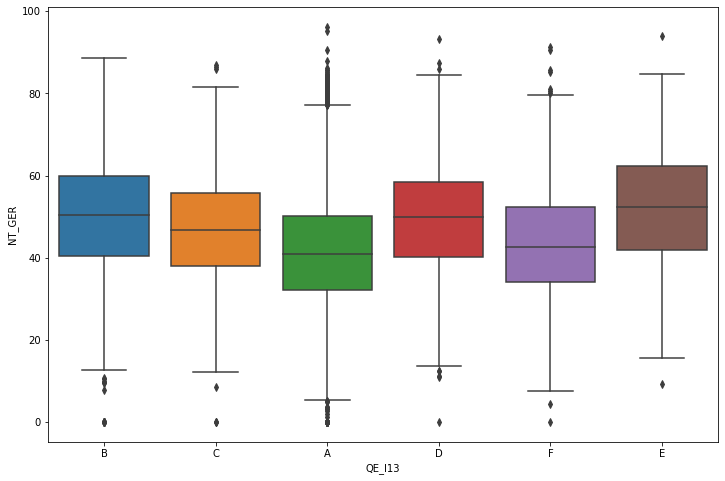

In [152]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I13')

## Ativdades Curriculares no Exterior

In [153]:
df.QE_I14.value_counts()

A    41121
B     1328
F      356
E      193
C       59
D       14
Name: QE_I14, dtype: int64

In [154]:
dict_QE_I14 = {'A': 'Não participei',
               'B': 'Sim, Programa Ciência sem Fronteiras',
               'C': 'Sim, programa de intercâmbio financiado pelo Governo Federal (Marca; Brafitec; PLI; outro)',
               'D': 'Sim, programa de intercâmbio financiado pelo Governo Estadual',
               'E': 'Sim, programa de intercâmbio da minha instituição',
               'F': 'Sim, outro intercâmbio não institucional',
              }

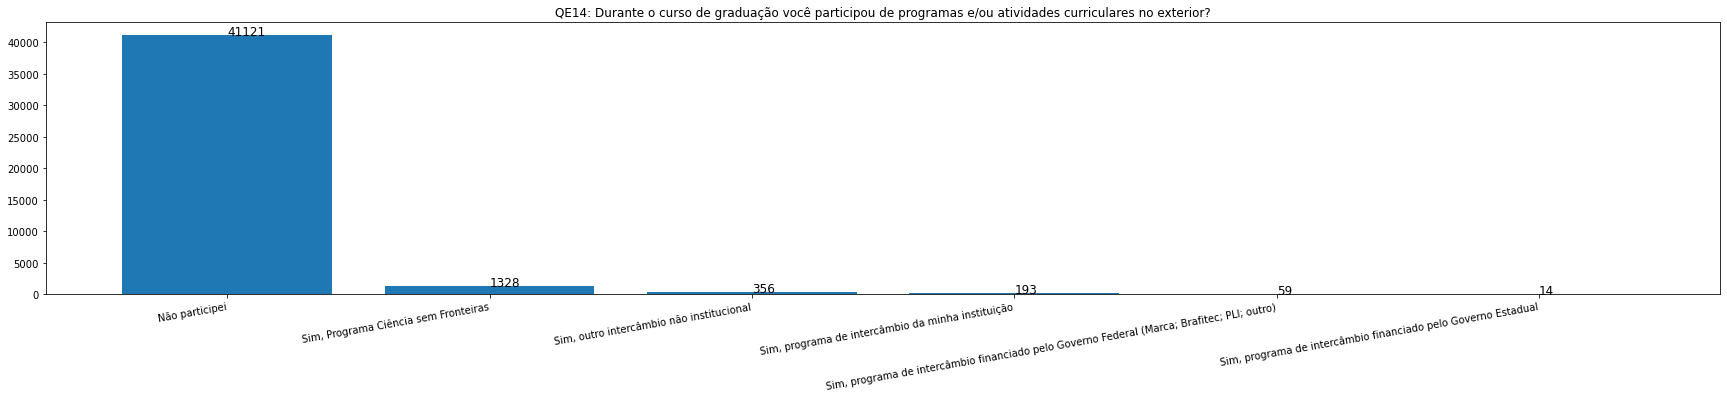

In [155]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I14[x] for x in list(df.QE_I14.value_counts().index)], df.QE_I14.value_counts())
for index in range(len(df.QE_I14.value_counts().index)):
    plt.text([dict_QE_I14[x] for x in list(df.QE_I14.value_counts().index)][index], df.QE_I14.value_counts()[index], df.QE_I14.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE14: Durante o curso de graduação você participou de programas e/ou atividades curriculares no exterior?')
ax = ax

In [156]:
agg_curr_ext = df.groupby(['QE_I14']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_curr_ext

,NT_GER
QE_I14,
B,53.970736
C,52.696429
E,48.110465
F,45.305167
A,42.264613
D,41.338462


<AxesSubplot:xlabel='QE_I14', ylabel='NT_GER'>

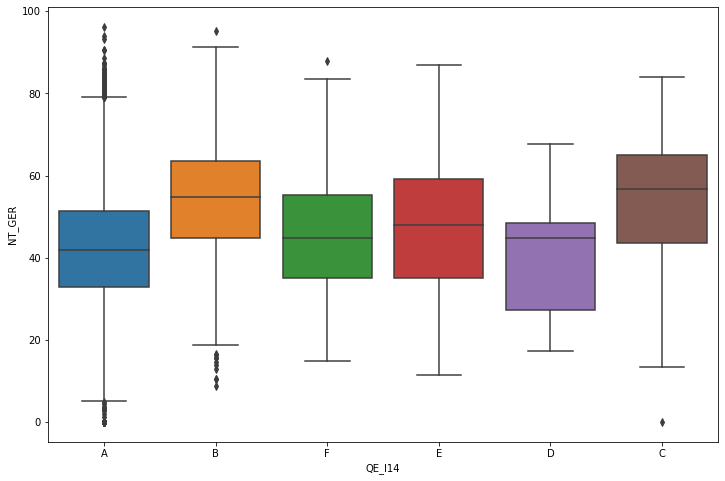

In [157]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I14')

## Políticas de ação afirmativa e inclusão sicial

In [158]:
df.QE_I15.value_counts()

A    34392
D     3694
C     2064
E     1672
F      633
B      616
Name: QE_I15, dtype: int64

In [159]:
dict_QE_I15 = {'A': 'Não',
               'B': 'Sim, por critério étnico-racial',
               'C': 'Sim, por critério de renda',
               'D': 'Sim, por ter estudado em escola pública ou particular com bolsa de estudos',
               'E': 'Sim, por sistema que combina dois ou mais critérios anteriores',
               'F': 'Sim, por sistema diferente dos anteriores',
              }

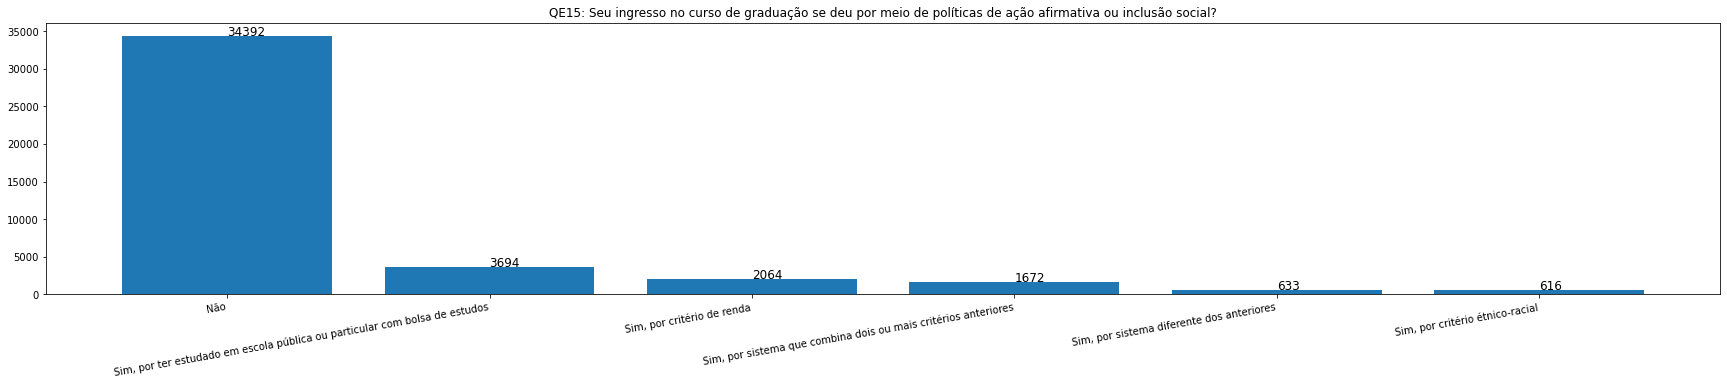

In [160]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I15[x] for x in list(df.QE_I15.value_counts().index)], df.QE_I15.value_counts())
for index in range(len(df.QE_I15.value_counts().index)):
    plt.text([dict_QE_I15[x] for x in list(df.QE_I15.value_counts().index)][index], df.QE_I15.value_counts()[index], df.QE_I15.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE15: Seu ingresso no curso de graduação se deu por meio de políticas de ação afirmativa ou inclusão social?')
ax = ax

In [161]:
agg_afirm = df.groupby(['QE_I15']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_afirm

,NT_GER
QE_I15,
E,45.815273
D,44.709555
A,42.551498
B,41.785690
C,40.343743
F,39.124788


<AxesSubplot:xlabel='QE_I15', ylabel='NT_GER'>

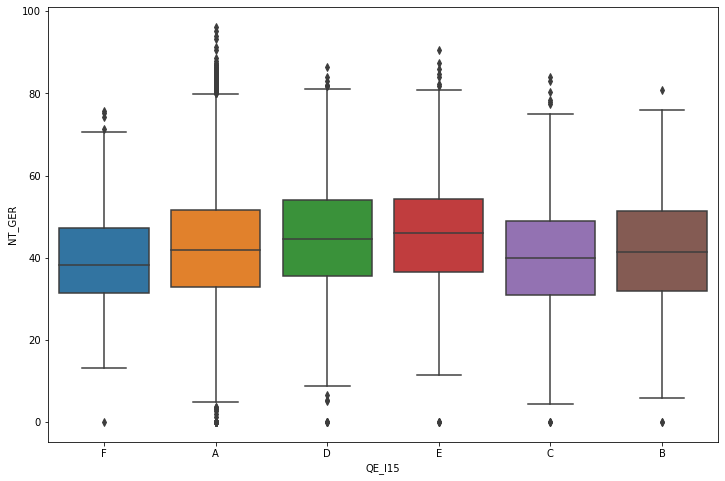

In [162]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I15')

## UF

In [163]:
df['QE_I16'] = df['QE_I16'].astype(str)

In [164]:
df.QE_I16.value_counts()

35.0    12915
nan      7941
31.0     4610
33.0     3776
43.0     3174
41.0     2229
42.0     1820
23.0     1781
26.0     1634
29.0     1370
53.0     1264
52.0     1207
15.0     1115
13.0      703
32.0      650
21.0      582
25.0      567
51.0      560
22.0      496
24.0      461
27.0      409
50.0      397
28.0      283
17.0      264
99.0      223
11.0      205
14.0      136
16.0      135
12.0      105
Name: QE_I16, dtype: int64

In [165]:
dict_QE_I16 = { '11.0' : 'RO',
            '12.0' : 'AC',
            '13.0' : 'AM',
            '14.0' : 'RR',
            '15.0' : 'PA',
            '16.0' : 'AP',
            '17.0' : 'TO',
            '21.0' : 'MA',
            '22.0' : 'PI',
            '23.0' : 'CE',
            '24.0' : 'RN',
            '25.0' : 'PB',
            '26.0' : 'PE',
            '27.0' : 'AL',
            '28.0' : 'SE',
            '29.0' : 'BA',
            '31.0' : 'MG',
            '32.0' : 'ES',
            '33.0' : 'RJ',
            '35.0' : 'SP',
            '41.0' : 'PR',
            '42.0' : 'SC',
            '43.0' : 'RS',
            '50.0' : 'MS',
            '51.0' : 'MT',
            '52.0' : 'GO',
            '53.0' : 'DF',
            'nan' : 'nan',
            '99.0' : 'Não se aplica'
            }

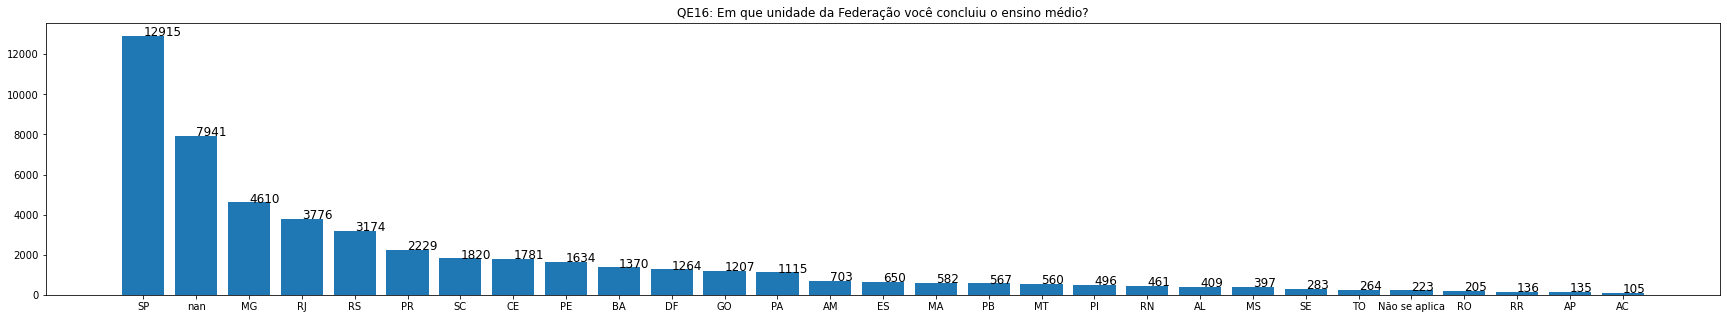

In [166]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I16[x] for x in list(df.QE_I16.value_counts().index)], df.QE_I16.value_counts())
for index in range(len(df.QE_I16.value_counts().index)):
    plt.text([dict_QE_I16[x] for x in list(df.QE_I16.value_counts().index)][index], df.QE_I16.value_counts()[index], df.QE_I16.value_counts()[index], size=12)

# plt.xticks(rotation=10, ha='right')
plt.title('QE16: Em que unidade da Federação você concluiu o ensino médio?')
ax = ax

In [167]:
agg_uf = df.groupby(['QE_I16']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_uf

,NT_GER
QE_I16,
32.0,46.527066
25.0,45.723475
24.0,45.421510
31.0,45.311876
26.0,44.299473
43.0,44.299062
41.0,43.948511
33.0,43.929489
42.0,43.878340


<AxesSubplot:xlabel='QE_I16', ylabel='NT_GER'>

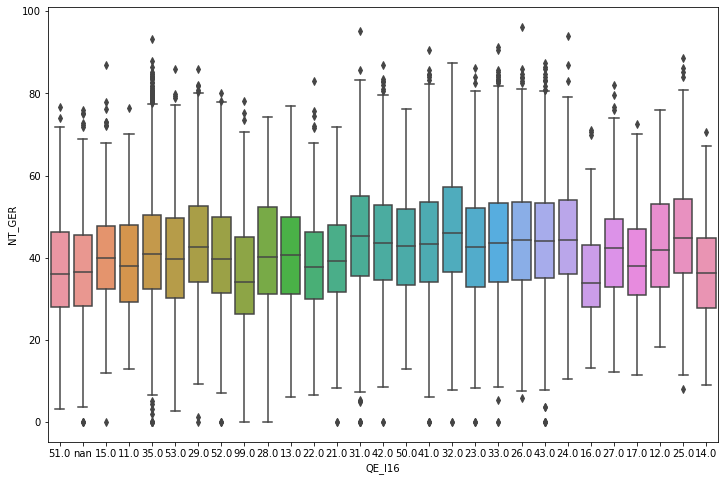

In [168]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I16')

## Tipo de escola Ensino médio

- QE_I17

In [169]:
df.QE_I17.value_counts()

A    27569
B    11324
D     2159
E     1868
F       80
C       71
Name: QE_I17, dtype: int64

In [170]:
dict_QE_I17 = {'A': 'Todo em escola pública',
               'B': 'Todo em escola privada (particular)',
               'C': 'Todo no exterior',
               'D': 'A maior parte em escola pública',
               'E': 'A maior parte em escola privada (particular)',
               'F': 'Parte no Brasil e parte no exterior',
              }

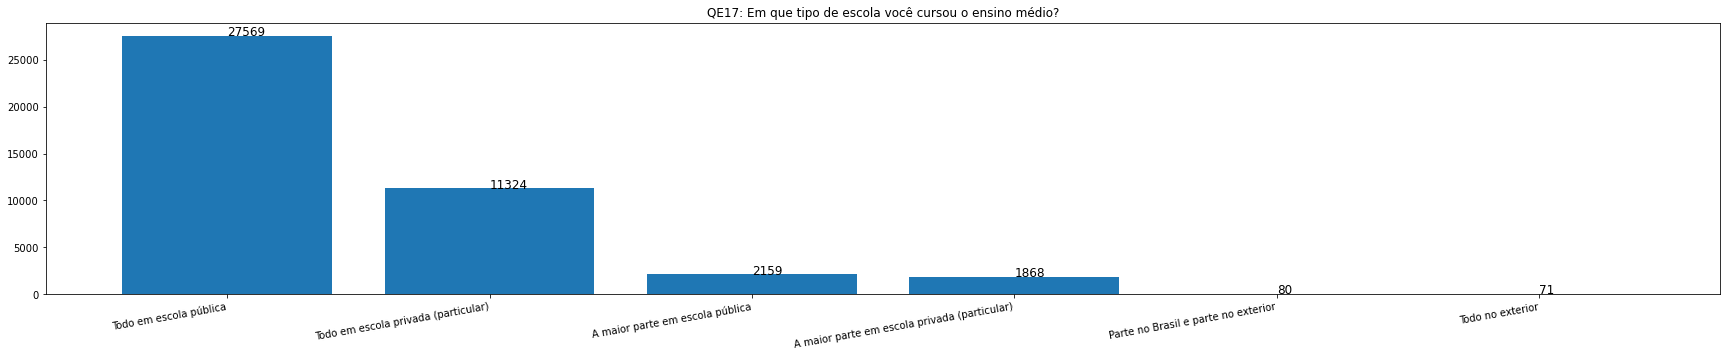

In [171]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I17[x] for x in list(df.QE_I17.value_counts().index)], df.QE_I17.value_counts())
for index in range(len(df.QE_I17.value_counts().index)):
    plt.text([dict_QE_I17[x] for x in list(df.QE_I17.value_counts().index)][index], df.QE_I17.value_counts()[index], df.QE_I17.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE17: Em que tipo de escola você cursou o ensino médio?')
ax = ax

In [172]:
agg_esc = df.groupby(['QE_I17']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)
agg_esc

,NT_GER
QE_I17,
F,46.884810
B,45.713517
E,42.554799
A,41.665043
D,40.122743
C,39.248438


<AxesSubplot:xlabel='QE_I17', ylabel='NT_GER'>

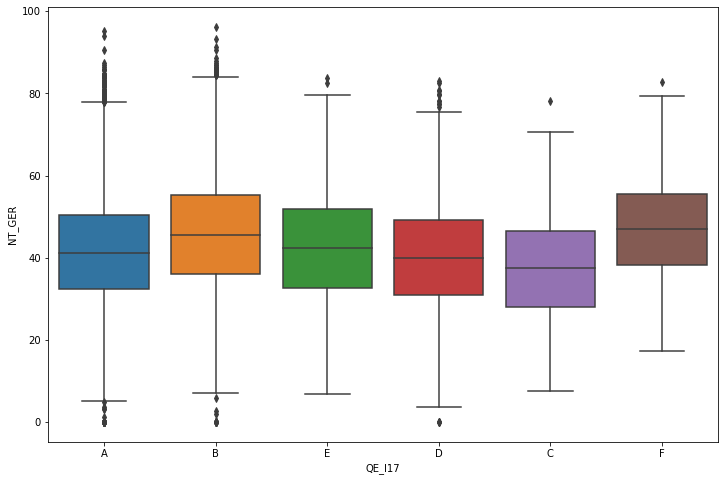

In [173]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I17')

## Modalidade Ensino Médio

In [174]:
df.QE_I18.value_counts()

A    34242
B     6409
D     1864
E      347
C      209
Name: QE_I18, dtype: int64

In [175]:
dict_QE_I18 = {'A': 'Ensino médio tradicional',
               'B': 'Profissionalizante técnico (eletrônica, contabilidade, agrícola, outro)',
               'C': 'Profissionalizante magistério (Curso Normal)',
               'D': 'Educação de Jovens e Adultos (EJA) e/ou Supletivo',
               'E': 'Outra modalidade'
              }

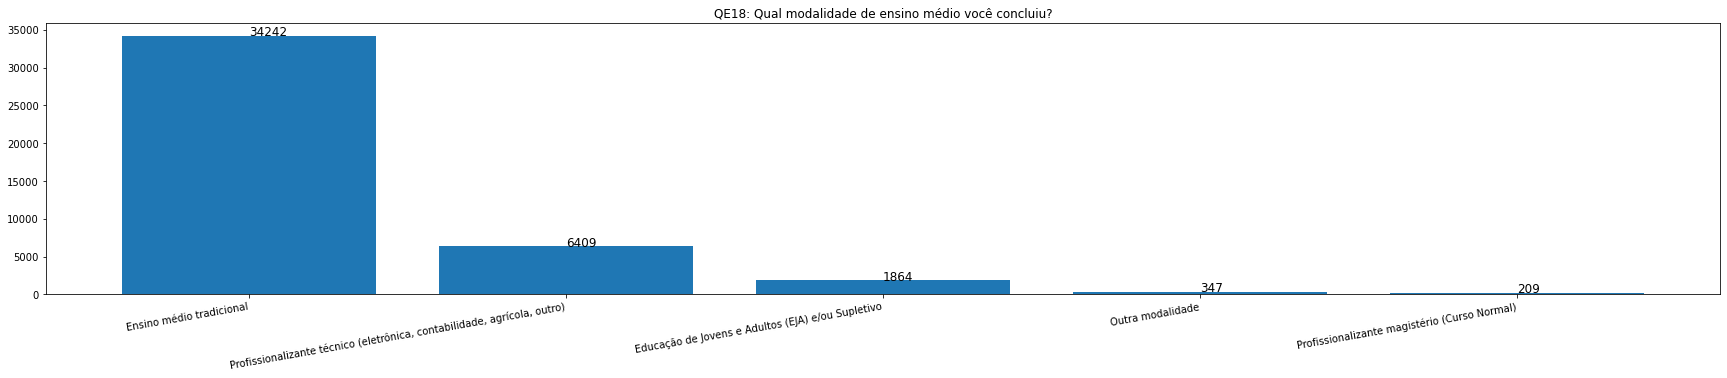

In [176]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I18[x] for x in list(df.QE_I18.value_counts().index)], df.QE_I18.value_counts())
for index in range(len(df.QE_I18.value_counts().index)):
    plt.text([dict_QE_I18[x] for x in list(df.QE_I18.value_counts().index)][index], df.QE_I18.value_counts()[index], df.QE_I18.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE18: Qual modalidade de ensino médio você concluiu?')
ax = ax

In [177]:
df.groupby(['QE_I18']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)

,NT_GER
QE_I18,
B,45.300416
A,42.490584
E,40.199678
D,38.550592
C,36.767391


<AxesSubplot:xlabel='QE_I18', ylabel='NT_GER'>

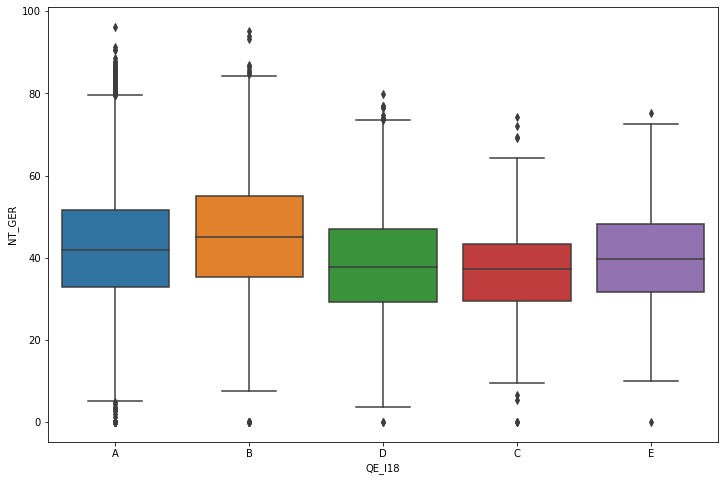

In [178]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I18')

## Incentivo graduação

In [179]:
df.QE_I19.value_counts()

B    26832
A     9271
C     2862
F     1969
G     1202
D      853
E       82
Name: QE_I19, dtype: int64

In [180]:
dict_QE_I19 = {'A': 'Ninguém',
               'B': 'Pais',
               'C': 'Outros membros da família que não os pais',
               'D': 'Professores',
               'E': 'Líder ou representante religioso',
               'F': 'Colegas/Amigos',
               'G': 'Outras pessoas'
              }

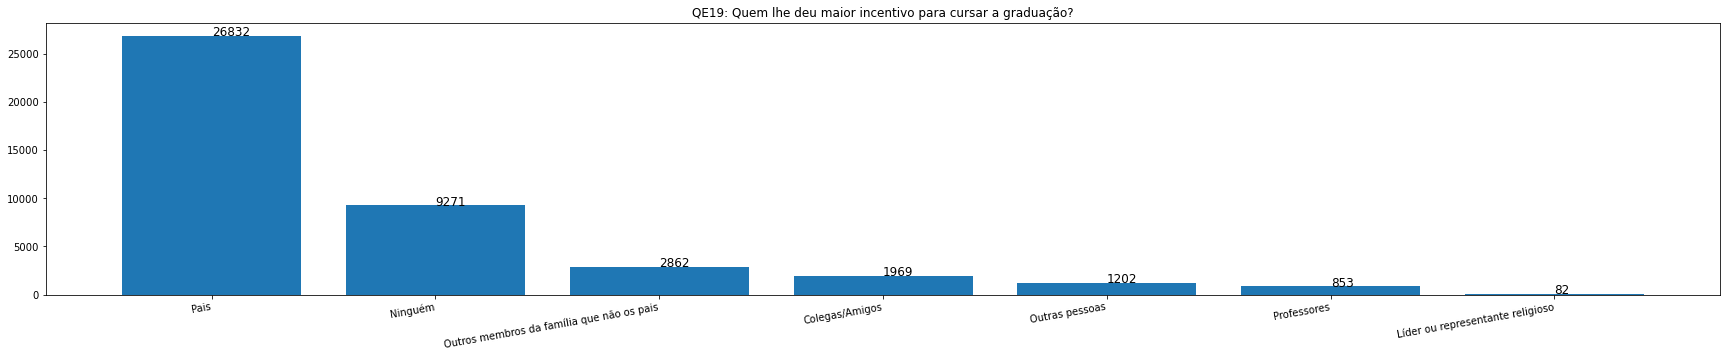

In [181]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I19[x] for x in list(df.QE_I19.value_counts().index)], df.QE_I19.value_counts())
for index in range(len(df.QE_I19.value_counts().index)):
    plt.text([dict_QE_I19[x] for x in list(df.QE_I19.value_counts().index)][index], df.QE_I19.value_counts()[index], df.QE_I19.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE19: Quem lhe deu maior incentivo para cursar a graduação?')
ax = ax

In [182]:
df.groupby(['QE_I19']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)

,NT_GER
QE_I19,
D,45.127560
B,43.148448
A,42.512646
E,41.446753
C,40.993769
F,40.951809
G,39.338544


<AxesSubplot:xlabel='QE_I19', ylabel='NT_GER'>

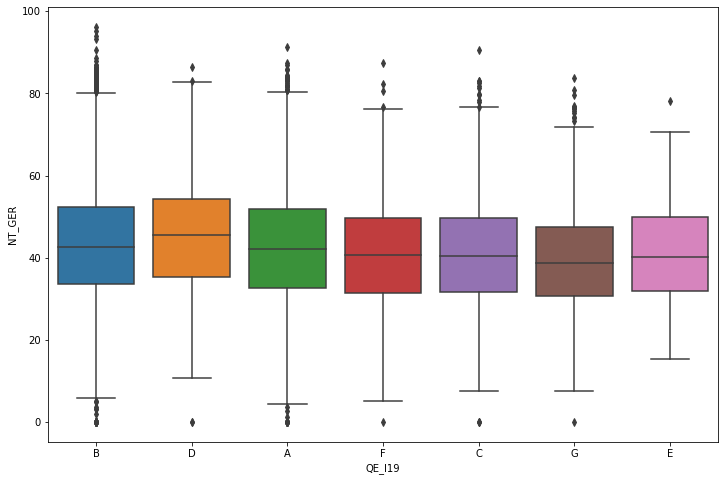

In [183]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I19')

## Grupo de apoio durante graduação

- QE_I20

In [184]:
df.QE_I20.value_counts()

C    14352
A    12596
G     4821
B     4002
K     2735
H     2405
E      778
J      659
D      474
I      125
F      124
Name: QE_I20, dtype: int64

In [185]:
dict_QE_I20 = {'A': 'Não tive dificuldade',
               'B': 'Não recebi apoio para enfrentar dificuldades',
               'C': 'Pais',
               'D': 'Avós',
               'E': 'Irmãos, primos ou tios',
               'F': 'Líder ou representante religioso',
               'G': 'Colegas de curso ou amigos',
               'H': 'Professores do curso',
               'I': 'Profissionais do serviço de apoio ao estudante da IES',
               'J': 'Colegas de trabalho',
               'K': 'Outro grupo'
              }

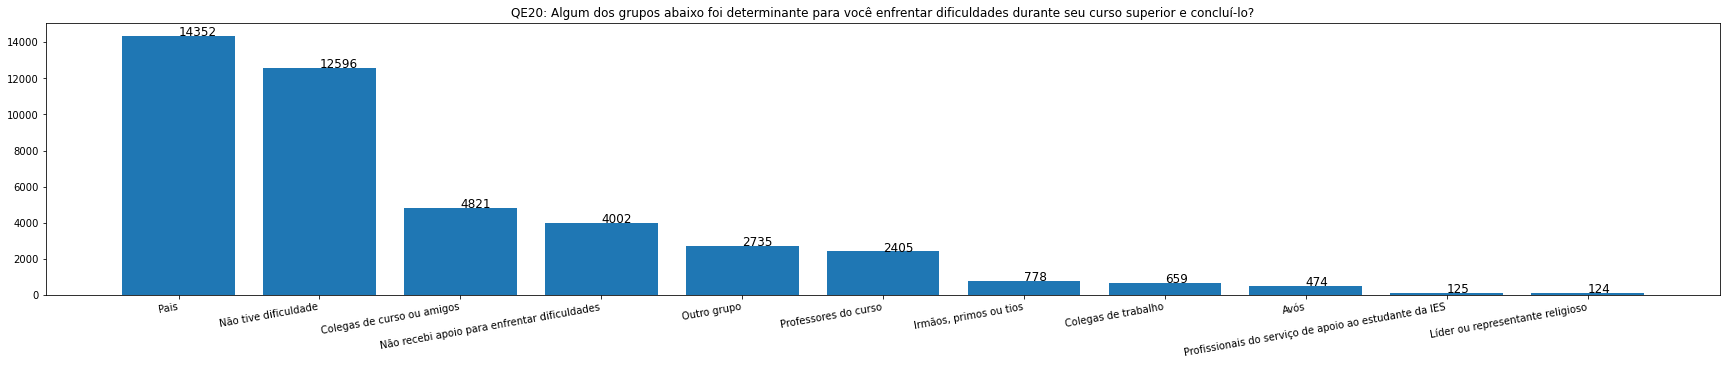

In [186]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I20[x] for x in list(df.QE_I20.value_counts().index)], df.QE_I20.value_counts())
for index in range(len(df.QE_I20.value_counts().index)):
    plt.text([dict_QE_I20[x] for x in list(df.QE_I20.value_counts().index)][index], df.QE_I20.value_counts()[index], df.QE_I20.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE20: Algum dos grupos abaixo foi determinante para você enfrentar dificuldades durante seu curso superior e concluí-lo?')
ax = ax

In [187]:
df.groupby(['QE_I20']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)

,NT_GER
QE_I20,
G,44.640453
I,43.924138
H,42.970487
A,42.694470
C,42.640121
B,42.112292
E,41.865746
F,41.511111
D,41.416592


<AxesSubplot:xlabel='QE_I20', ylabel='NT_GER'>

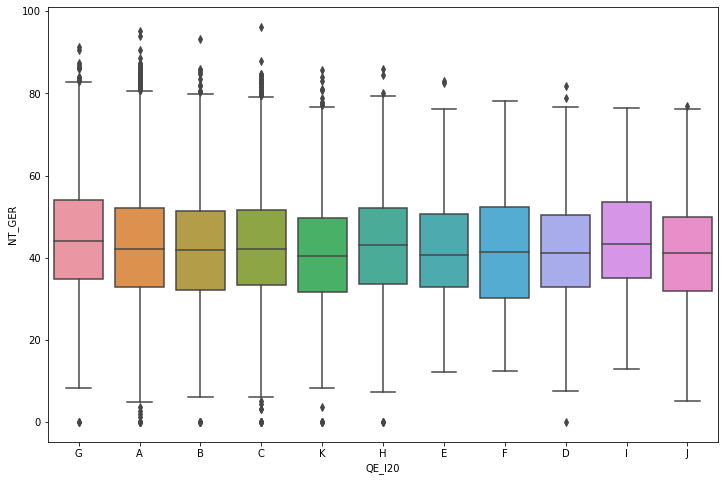

In [188]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I20')

## Concluintes do ensino superior na família

- QE21 

In [189]:
df.QE_I21.value_counts()

A    29589
B    13482
Name: QE_I21, dtype: int64

In [190]:
dict_QE_I21 = {'A': 'Sim',
               'B': 'Não'
              }

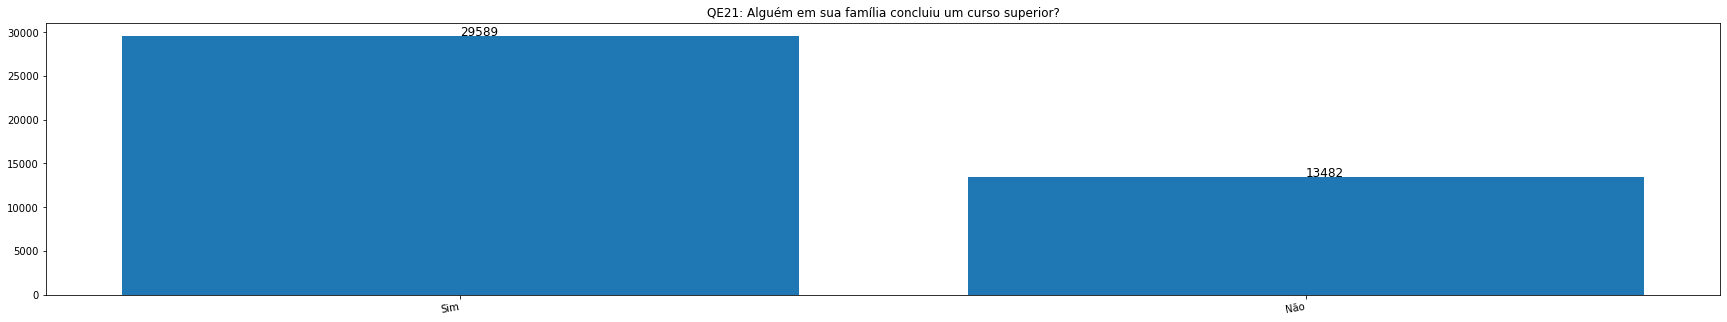

In [191]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I21[x] for x in list(df.QE_I21.value_counts().index)], df.QE_I21.value_counts())
for index in range(len(df.QE_I21.value_counts().index)):
    plt.text([dict_QE_I21[x] for x in list(df.QE_I21.value_counts().index)][index], df.QE_I21.value_counts()[index], df.QE_I21.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE21: Alguém em sua família concluiu um curso superior?')
ax = ax

In [192]:
df.groupby(['QE_I21']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)

,NT_GER
QE_I21,
A,43.319606
B,41.348639


<AxesSubplot:xlabel='QE_I21', ylabel='NT_GER'>

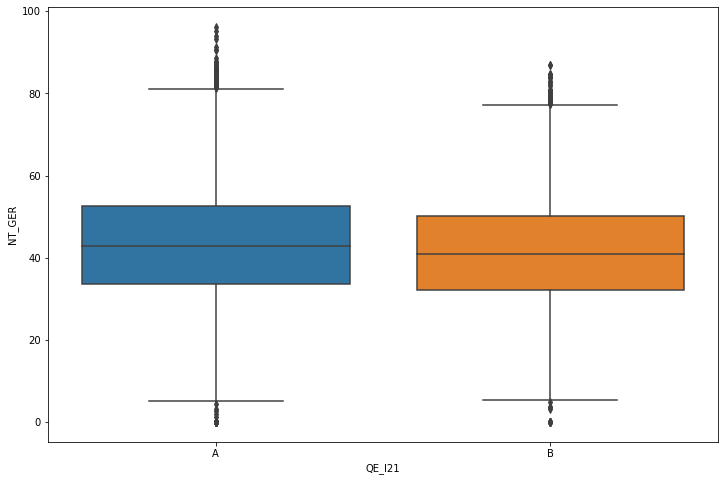

In [193]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I21')

## Livros lido no ano

- QE_I22

In [194]:
df.QE_I22.value_counts()

B    16912
C    10768
A     9200
E     3518
D     2673
Name: QE_I22, dtype: int64

In [195]:
dict_QE_I22 = {'A': 'Nenhum',
               'B': 'Um ou dois',
               'C': 'De três a cinco',
               'D': 'De seis a oito',
               'E': 'Mais de oito'
              }

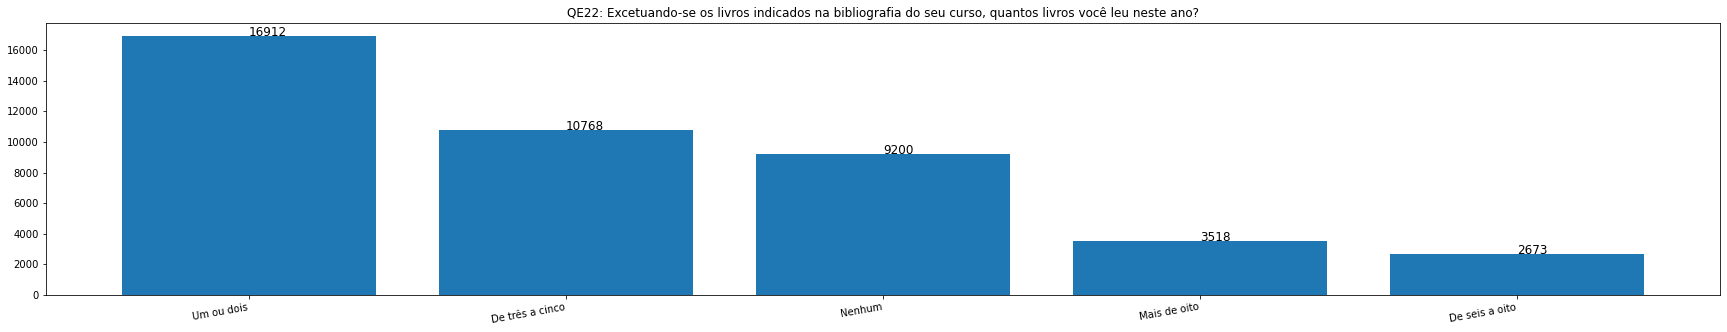

In [196]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I22[x] for x in list(df.QE_I22.value_counts().index)], df.QE_I22.value_counts())
for index in range(len(df.QE_I22.value_counts().index)):
    plt.text([dict_QE_I22[x] for x in list(df.QE_I22.value_counts().index)][index], df.QE_I22.value_counts()[index], df.QE_I22.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE22: Excetuando-se os livros indicados na bibliografia do seu curso, quantos livros você leu neste ano?')
ax = ax

In [197]:
df.groupby(['QE_I22']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)

,NT_GER
QE_I22,
E,44.862332
D,43.851792
C,43.358545
B,42.216912
A,41.665779


<AxesSubplot:xlabel='QE_I22', ylabel='NT_GER'>

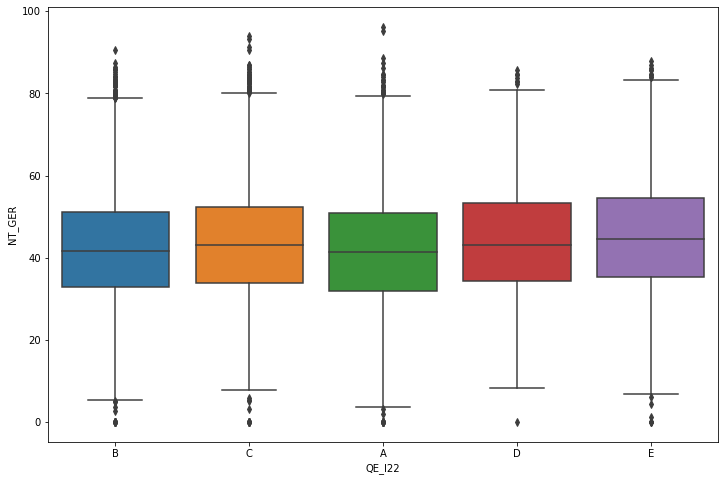

In [198]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I22')

## Horas semanais dedicadas ao estudo

- QE_I23

In [199]:
df.QE_I23.value_counts()

B    18046
C    12492
D     4923
E     4415
A     3195
Name: QE_I23, dtype: int64

In [200]:
dict_QE_I23 = {'A': 'Nenhuma, apenas assisto às aulas',
               'B': 'De uma a três',
               'C': 'De quatro a sete',
               'D': 'De oito a doze',
               'E': 'Mais de doze'
              }

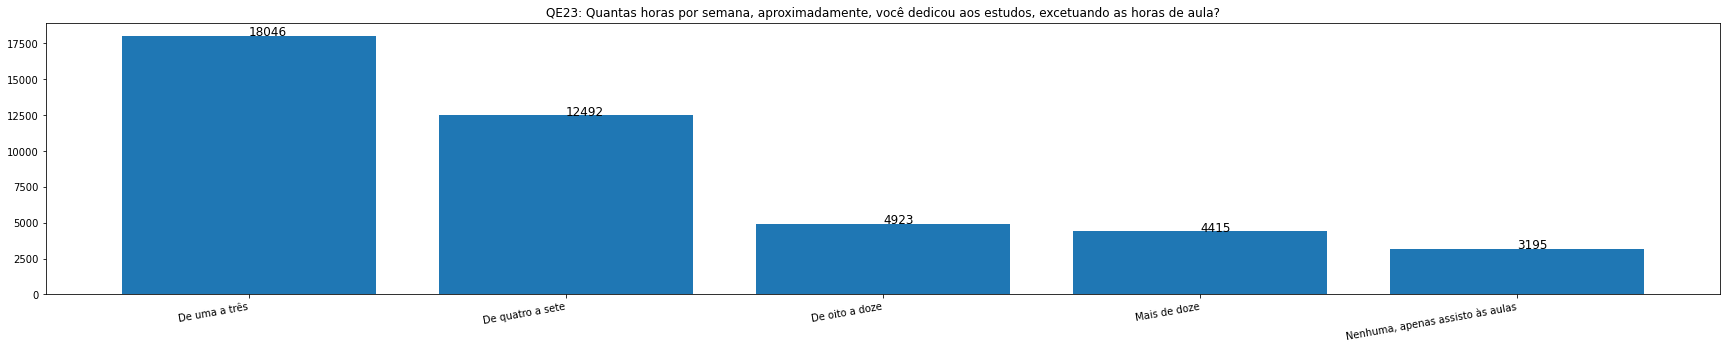

In [201]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I23[x] for x in list(df.QE_I23.value_counts().index)], df.QE_I23.value_counts())
for index in range(len(df.QE_I23.value_counts().index)):
    plt.text([dict_QE_I23[x] for x in list(df.QE_I23.value_counts().index)][index], df.QE_I23.value_counts()[index], df.QE_I23.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE23: Quantas horas por semana, aproximadamente, você dedicou aos estudos, excetuando as horas de aula?')
ax = ax

In [202]:
df.groupby(['QE_I23']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)

,NT_GER
QE_I23,
E,45.432030
D,45.330882
C,43.641467
A,41.202546
B,40.895932


<AxesSubplot:xlabel='QE_I23', ylabel='NT_GER'>

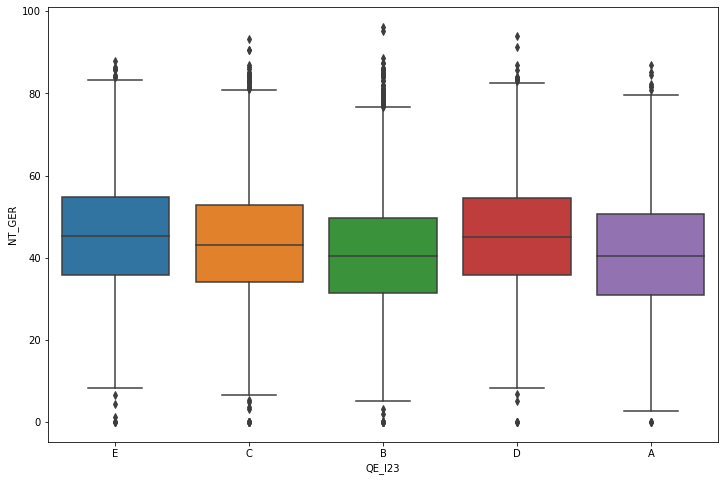

In [203]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I23')

## Aprendizado de idioma estrangeiro

- QE_I24

In [204]:
df.QE_I24.value_counts()

E    22059
A    14108
D     3840
C     2466
B      598
Name: QE_I24, dtype: int64

In [205]:
dict_QE_I24 = {'A': 'Sim, somente na modalidade presencial',
               'B': 'Sim, somente na modalidade semipresencial',
               'C': 'Sim, parte na modalidade presencial e parte na modalidade semipresencial',
               'D': 'Sim, na modalidade a distância',
               'E': 'Não'
              }

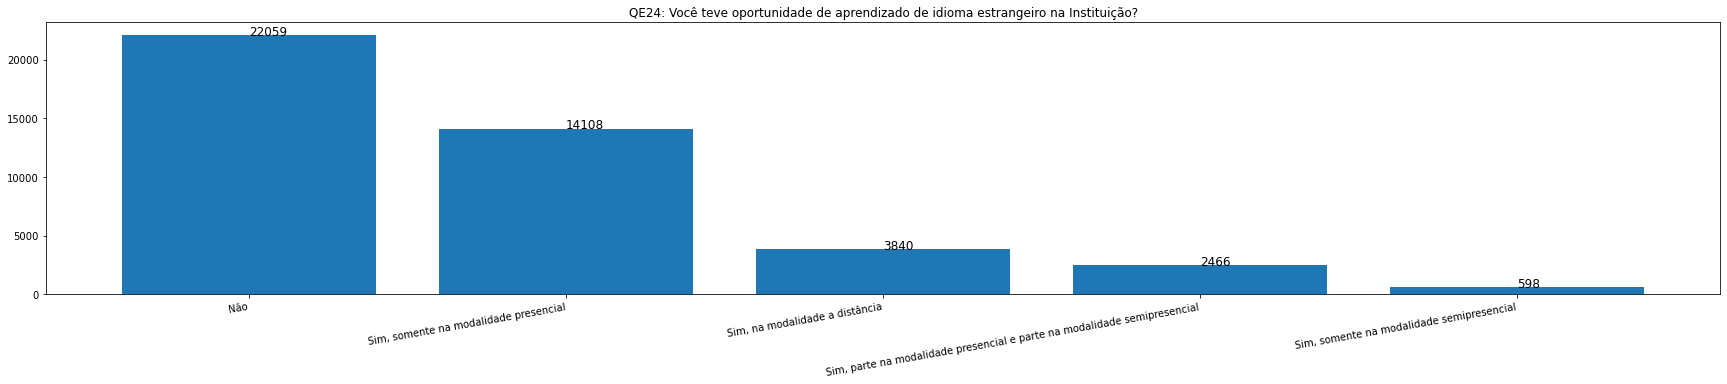

In [206]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I24[x] for x in list(df.QE_I24.value_counts().index)], df.QE_I24.value_counts())
for index in range(len(df.QE_I24.value_counts().index)):
    plt.text([dict_QE_I24[x] for x in list(df.QE_I24.value_counts().index)][index], df.QE_I24.value_counts()[index], df.QE_I24.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE24: Você teve oportunidade de aprendizado de idioma estrangeiro na Instituição?')
ax = ax

In [207]:
df.groupby(['QE_I24']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)

,NT_GER
QE_I24,
C,45.910354
A,43.460536
E,42.009413
D,41.992774
B,41.432369


<AxesSubplot:xlabel='QE_I24', ylabel='NT_GER'>

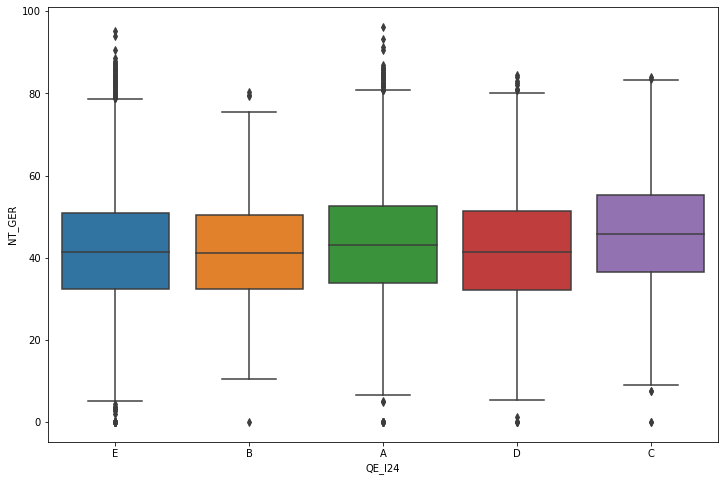

In [208]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I24')

## Motivo para a escolha do curso

- QE_I25 

In [209]:
df.QE_I25.value_counts()

E    13875
A    13148
C     7225
H     5785
B     1734
F      731
G      362
D      211
Name: QE_I25, dtype: int64

In [210]:
dict_QE_I25 = {'A': 'Inserção no mercado de trabalho',
               'B': 'Influência familiar',
               'C': 'Valorização profissional',
               'D': 'Prestígio Social',
               'E': 'Vocação',
               'F': 'Oferecido na modalidade a distância',
               'G': 'Baixa concorrência para ingresso',
               'H': 'Outro motivo'
              }

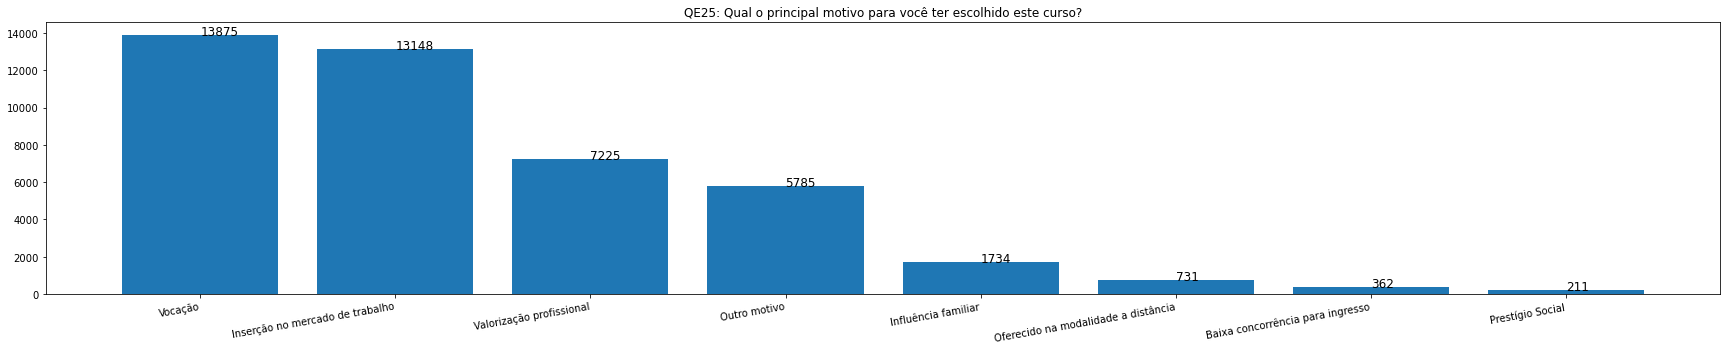

In [211]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I25[x] for x in list(df.QE_I25.value_counts().index)], df.QE_I25.value_counts())
for index in range(len(df.QE_I25.value_counts().index)):
    plt.text([dict_QE_I25[x] for x in list(df.QE_I25.value_counts().index)][index], df.QE_I25.value_counts()[index], df.QE_I25.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE25: Qual o principal motivo para você ter escolhido este curso?')
ax = ax

In [212]:
df.groupby(['QE_I25']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)

,NT_GER
QE_I25,
E,44.901705
F,43.474343
A,41.808021
H,41.745369
C,41.556760
G,41.311377
D,39.972727
B,39.966833


<AxesSubplot:xlabel='QE_I25', ylabel='NT_GER'>

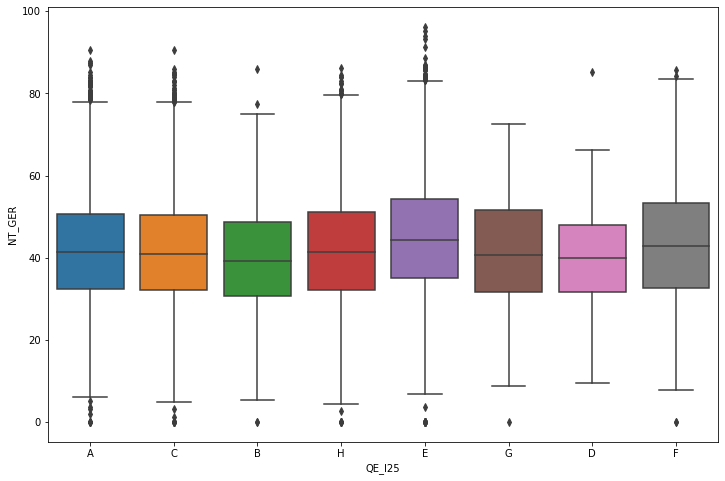

In [213]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I25')

## Motivo pela escolha da instituição

- QE_I26

In [214]:
df.QE_I26.value_counts()

F    15652
A     7112
C     6587
B     3945
I     3423
E     2425
H     2220
D      978
G      729
Name: QE_I26, dtype: int64

In [215]:
dict_QE_I26 = {'A': 'Gratuidade',
               'B': 'Preço da mensalidade',
               'C': 'Proximidade da minha residência',
               'D': 'Proximidade do meu trabalho',
               'E': 'Facilidade de acesso',
               'F': 'Qualidade/reputação',
               'G': 'Foi a única onde tive aprovação',
               'H': 'Possibilidade de ter bolsa de estudo',
               'I': 'Outro motivo'
              }

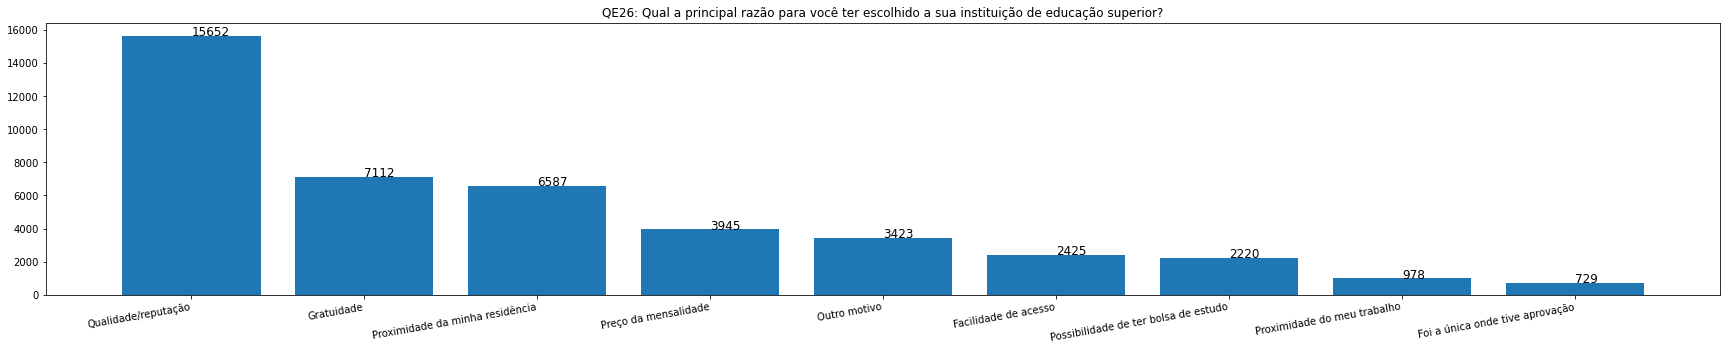

In [216]:
plt.figure(figsize=(30,5))
ax = plt.bar([dict_QE_I26[x] for x in list(df.QE_I26.value_counts().index)], df.QE_I26.value_counts())
for index in range(len(df.QE_I26.value_counts().index)):
    plt.text([dict_QE_I26[x] for x in list(df.QE_I26.value_counts().index)][index], df.QE_I26.value_counts()[index], df.QE_I26.value_counts()[index], size=12)

plt.xticks(rotation=10, ha='right')
plt.title('QE26: Qual a principal razão para você ter escolhido a sua instituição de educação superior?')
ax = ax

In [217]:
df.groupby(['QE_I26']).agg({'NT_GER':'mean'}).sort_values(by='NT_GER', ascending=False)

,NT_GER
QE_I26,
F,44.874912
A,43.979209
H,42.497165
G,42.369367
C,41.690619
D,40.623852
I,40.565982
E,39.094654
B,38.020577


<AxesSubplot:xlabel='QE_I26', ylabel='NT_GER'>

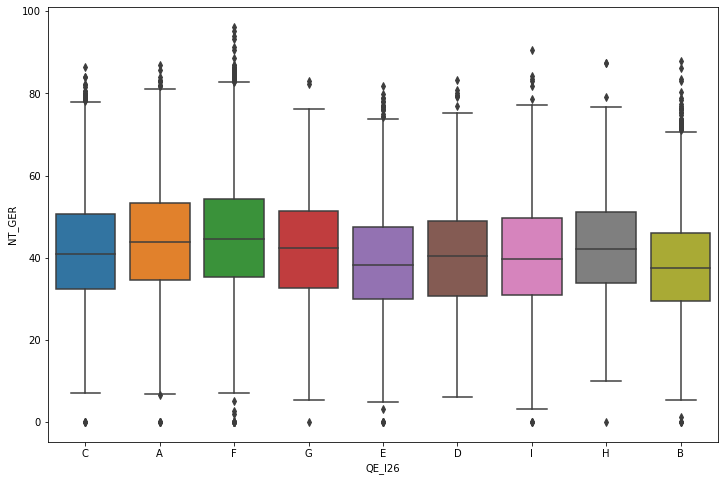

In [218]:
plt.figure(figsize=(12,8))

sns.boxplot(data=df, y='NT_GER', x='QE_I26')

# Full Dataset

In [270]:
full_df = df[['CO_GRUPO',
              'CO_ORGACAD',
              'NT_GER',
              'DELTA_MEDIO_GRADUACAO',
              'QE_I02',
              'QE_I04',
              'QE_I05',
              'QE_I06',
              'QE_I08',
              'QE_I09',
              'QE_I10',
              'QE_I11',
              'QE_I17',
              'QE_I20',
              'QE_I21',
              'QE_I22',
              'QE_I23',
              'QE_I24',
              'QE_I25',
              'QE_I26']]

In [271]:
full_df.to_csv('full_df.csv', sep=';', index=False)

# Limpeza dos dados

In [272]:
df_full = pd.read_csv('full_df.csv', sep=';')

In [273]:
df_full

,CO_GRUPO,CO_ORGACAD,NT_GER,DELTA_MEDIO_GRADUACAO,QE_I02,QE_I04,QE_I05,QE_I06,QE_I08,QE_I09,QE_I10,QE_I11,QE_I17,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26
0,4004,10028,58.7,0.0,D,D,F,B,E,C,A,A,A,G,A,B,E,E,A,C
1,4004,10028,49.8,2.0,A,D,C,A,C,B,A,A,A,A,A,C,C,B,C,A
2,4004,10028,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4004,10028,40.1,1.0,A,D,D,B,C,E,A,A,A,B,B,B,C,A,B,C
4,4004,10028,53.2,3.0,D,B,B,D,B,A,A,A,A,G,B,C,C,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,79,10028,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51008,79,10028,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51009,79,10028,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51010,79,10028,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
df_full.isna().sum()

CO_GRUPO                     0
CO_ORGACAD                   0
NT_GER                   10458
DELTA_MEDIO_GRADUACAO        0
QE_I02                    7941
QE_I04                    7941
QE_I05                    7941
QE_I06                    7941
QE_I08                    7941
QE_I09                    7941
QE_I10                    7941
QE_I11                    7941
QE_I17                    7941
QE_I20                    7941
QE_I21                    7941
QE_I22                    7941
QE_I23                    7941
QE_I24                    7941
QE_I25                    7941
QE_I26                    7941
dtype: int64

In [275]:
qe_na_list = df_full[df_full['QE_I02'].isna()].index

In [276]:
df_full.drop(index=qe_na_list, inplace=True)

In [277]:
df_full.isna().sum()

CO_GRUPO                    0
CO_ORGACAD                  0
NT_GER                   2909
DELTA_MEDIO_GRADUACAO       0
QE_I02                      0
QE_I04                      0
QE_I05                      0
QE_I06                      0
QE_I08                      0
QE_I09                      0
QE_I10                      0
QE_I11                      0
QE_I17                      0
QE_I20                      0
QE_I21                      0
QE_I22                      0
QE_I23                      0
QE_I24                      0
QE_I25                      0
QE_I26                      0
dtype: int64

In [278]:
nt_ger_median = df_full.NT_GER.median()

In [279]:
df_full.NT_GER.fillna(nt_ger_median, inplace=True)

In [280]:
df_full.isna().sum()

CO_GRUPO                 0
CO_ORGACAD               0
NT_GER                   0
DELTA_MEDIO_GRADUACAO    0
QE_I02                   0
QE_I04                   0
QE_I05                   0
QE_I06                   0
QE_I08                   0
QE_I09                   0
QE_I10                   0
QE_I11                   0
QE_I17                   0
QE_I20                   0
QE_I21                   0
QE_I22                   0
QE_I23                   0
QE_I24                   0
QE_I25                   0
QE_I26                   0
dtype: int64

In [281]:
df_full.to_csv('full_df_clean.csv', sep=';', index=False)

# Label Encoder

In [2]:
df_full_clean = pd.read_csv('full_df_clean.csv', sep=';')

In [3]:
df_label_enc = df_full_clean.copy()

In [4]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

In [5]:
for i in df_label_enc.columns[4:]:
    df_label_enc[i] = label_encoder.fit_transform(df_label_enc[i])

In [6]:
for i in df_label_enc.columns[:2]:
    df_label_enc[i] = label_encoder.fit_transform(df_label_enc[i])

In [7]:
df_label_enc

,CO_GRUPO,CO_ORGACAD,NT_GER,DELTA_MEDIO_GRADUACAO,QE_I02,QE_I04,QE_I05,QE_I06,QE_I08,QE_I09,QE_I10,QE_I11,QE_I17,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26
0,3,4,58.7,0.0,3,3,5,1,4,2,0,0,0,6,0,1,4,4,0,2
1,3,4,49.8,2.0,0,3,2,0,2,1,0,0,0,0,0,2,2,1,2,0
2,3,4,40.1,1.0,0,3,3,1,2,4,0,0,0,1,1,1,2,0,1,2
3,3,4,53.2,3.0,3,1,1,3,1,0,0,0,0,6,1,2,2,0,0,0
4,3,4,52.4,1.0,0,4,5,1,1,1,0,0,1,6,0,2,4,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43066,0,4,42.2,3.0,0,4,3,1,2,4,3,1,4,2,0,2,3,4,4,1
43067,0,1,42.2,15.0,0,1,1,2,3,4,4,1,0,10,0,0,1,4,2,2
43068,6,1,42.2,1.0,0,4,3,1,2,2,1,1,0,1,1,2,0,4,0,1
43069,6,1,42.2,1.0,1,3,3,1,2,2,4,3,0,2,1,1,1,4,1,7


# Matriz de correlação

Text(0.5, 1.0, 'MATRIZ DE CORRELAÇÃO')

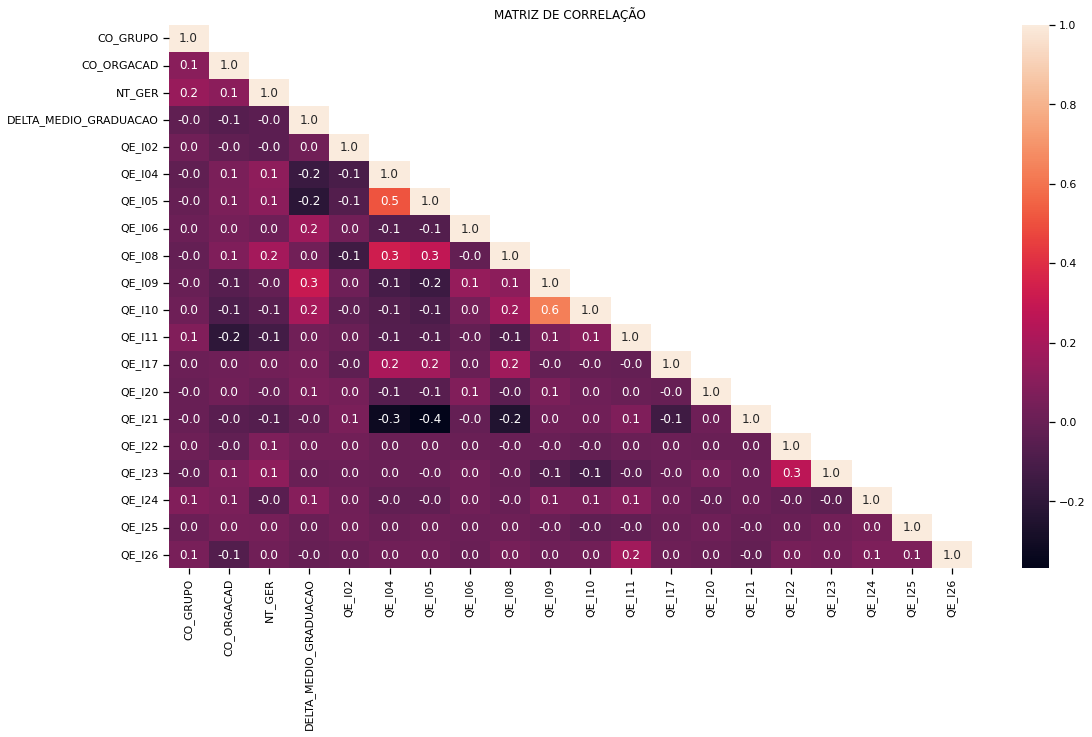

In [8]:
#Matriz de correlação
corr = df_label_enc.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(18,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.1f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.title('MATRIZ DE CORRELAÇÃO')

In [9]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

In [10]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [11]:
df_label_enc.drop(to_drop, axis=1, inplace=True)

In [12]:
pd.options.display.max_columns=99
df_label_enc

,CO_GRUPO,CO_ORGACAD,NT_GER,DELTA_MEDIO_GRADUACAO,QE_I02,QE_I04,QE_I05,QE_I06,QE_I08,QE_I09,QE_I10,QE_I11,QE_I17,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26
0,3,4,58.7,0.0,3,3,5,1,4,2,0,0,0,6,0,1,4,4,0,2
1,3,4,49.8,2.0,0,3,2,0,2,1,0,0,0,0,0,2,2,1,2,0
2,3,4,40.1,1.0,0,3,3,1,2,4,0,0,0,1,1,1,2,0,1,2
3,3,4,53.2,3.0,3,1,1,3,1,0,0,0,0,6,1,2,2,0,0,0
4,3,4,52.4,1.0,0,4,5,1,1,1,0,0,1,6,0,2,4,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43066,0,4,42.2,3.0,0,4,3,1,2,4,3,1,4,2,0,2,3,4,4,1
43067,0,1,42.2,15.0,0,1,1,2,3,4,4,1,0,10,0,0,1,4,2,2
43068,6,1,42.2,1.0,0,4,3,1,2,2,1,1,0,1,1,2,0,4,0,1
43069,6,1,42.2,1.0,1,3,3,1,2,2,4,3,0,2,1,1,1,4,1,7


Text(0.5, 1.0, 'MATRIZ DE CORRELAÇÃO')

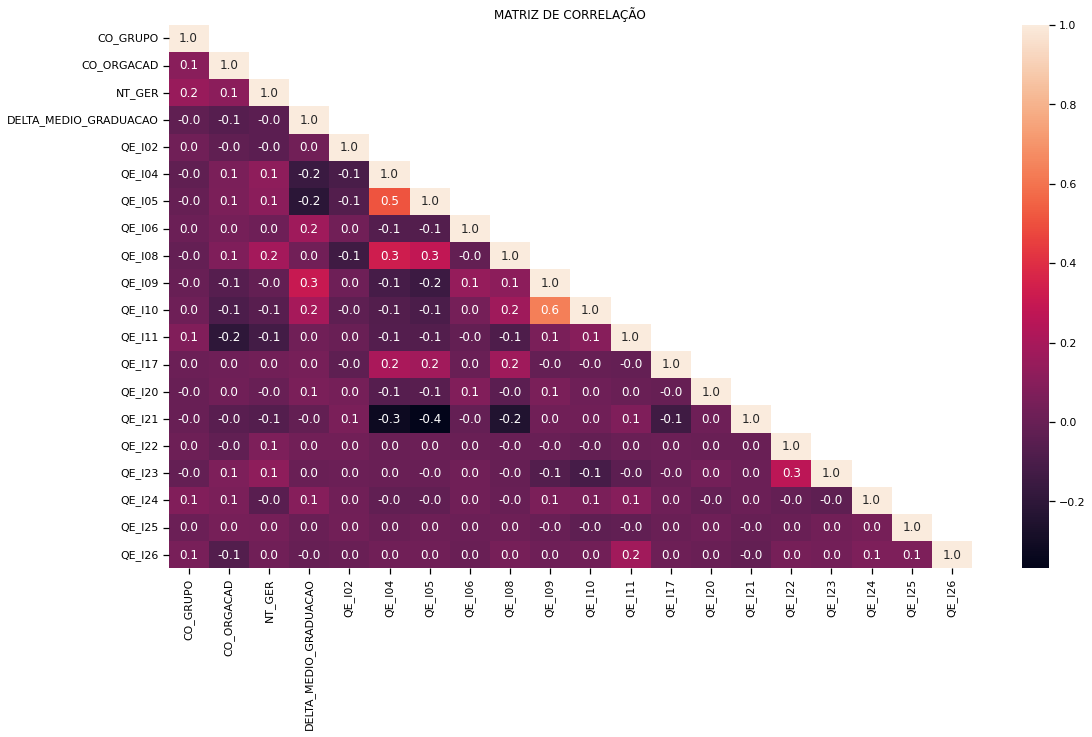

In [13]:
#Matriz de correlação
corr = df_label_enc.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(18,10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.1f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=0)
plt.title('MATRIZ DE CORRELAÇÃO')

# Redução de dimensionalidade com Select K-best

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from imblearn.over_sampling import SMOTE

In [15]:
y = df_label_enc['NT_GER']
X = df_label_enc.drop(columns='NT_GER')

In [16]:
X_new = SelectKBest(f_classif, k=10).fit(X, y)

In [17]:
dfscores = pd.DataFrame(X_new.scores_)

In [18]:
dfcolumns = pd.DataFrame(X.columns)

In [19]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [20]:
featureScores.columns = ['Specs','Score']

In [21]:
featureScores.nlargest(30,'Score')['Score'].median()

1.1759757731839728

In [22]:
featureScores.nlargest(20,'Score')

,Specs,Score
7,QE_I08,3.194448
0,CO_GRUPO,2.875904
10,QE_I11,1.919796
15,QE_I23,1.897448
4,QE_I04,1.862556
1,CO_ORGACAD,1.766292
5,QE_I05,1.677743
14,QE_I22,1.357162
2,DELTA_MEDIO_GRADUACAO,1.328710
9,QE_I10,1.175976


In [23]:
k_features = featureScores.nlargest(15,'Score').reset_index(drop=True)

In [24]:
cols = []
[cols.append(k_features['Specs'][x]) for x in range(len(k_features['Specs']))]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [25]:
# df_model = pd.concat([df_label_enc['class'], df_label_enc[cols]], axis=1)

# Categorizando a variável alvo

In [26]:
df_label_enc['NT_GER_binned_score'] = pd.cut(df_label_enc['NT_GER'], bins=[0,20,30,40,50,100], right=True, labels=False)+1

In [27]:
df_label_enc['NT_GER_binned_score'].fillna(1, inplace=True)

In [28]:
df_label_enc['NT_GER_binned_score'].value_counts()

4.0    13795
5.0    11671
3.0    10304
2.0     5732
1.0     1569
Name: NT_GER_binned_score, dtype: int64

# Balanceamento de Variáveis

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
oversample = SMOTE()

In [31]:
x = df_label_enc.drop(columns=['NT_GER_binned_score'])
y = df_label_enc['NT_GER_binned_score']

In [32]:
x_balanced, y_balanced = oversample.fit_resample(x, y)

In [33]:
df_balanced = pd.concat([y_balanced, x_balanced], axis=1)

In [34]:
df_balanced['NT_GER_binned_score'].value_counts()

5.0    13795
4.0    13795
2.0    13795
3.0    13795
1.0    13795
Name: NT_GER_binned_score, dtype: int64

In [35]:
df_balanced

,NT_GER_binned_score,CO_GRUPO,CO_ORGACAD,NT_GER,DELTA_MEDIO_GRADUACAO,QE_I02,QE_I04,QE_I05,QE_I06,QE_I08,QE_I09,QE_I10,QE_I11,QE_I17,QE_I20,QE_I21,QE_I22,QE_I23,QE_I24,QE_I25,QE_I26
0,5.0,3,4,58.700000,0.000000,3,3,5,1,4,2,0,0,0,6,0,1,4,4,0,2
1,4.0,3,4,49.800000,2.000000,0,3,2,0,2,1,0,0,0,0,0,2,2,1,2,0
2,4.0,3,4,40.100000,1.000000,0,3,3,1,2,4,0,0,0,1,1,1,2,0,1,2
3,5.0,3,4,53.200000,3.000000,3,1,1,3,1,0,0,0,0,6,1,2,2,0,0,0
4,5.0,3,4,52.400000,1.000000,0,4,5,1,1,1,0,0,1,6,0,2,4,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68970,5.0,3,4,61.395133,1.000000,1,3,4,1,2,2,0,0,0,10,0,1,3,4,7,5
68971,5.0,5,1,51.130466,2.652332,1,2,0,1,0,2,4,7,0,0,1,2,1,0,3,3
68972,5.0,5,4,66.604238,1.000000,0,1,4,1,1,4,4,0,0,2,0,0,3,3,4,5
68973,5.0,6,2,57.771483,8.944683,0,1,1,1,0,2,0,0,0,2,0,2,3,0,3,5


# Testando Algoritmos

## Separação base de treino e teste

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# x = df_label_enc.drop(columns=['NT_GER_binned_score'])
# y = df_label_enc['NT_GER_binned_score']

# SEED = 158020
# np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x_balanced, y_balanced, test_size = 0.3,
                                                         stratify = y_balanced, random_state=0)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 48282 elementos e testaremos com 20693 elementos


In [37]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi de %.2f%%" % acuracia)

A acurácia do dummy stratified foi de 20.11%


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

## Regressão Logística

In [39]:
lr = LogisticRegression(max_iter=400, random_state=0)

lr.fit(treino_x, treino_y)
y_pred = lr.predict(teste_x)

In [40]:
#Métricas
print("Acurácia:",metrics.accuracy_score(teste_y, y_pred))
print("Precisão:",metrics.precision_score(teste_y, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(teste_y, y_pred, average='weighted')) 
print("F1:",metrics.f1_score(teste_y, y_pred, average='weighted'))

Acurácia: 0.9444256511863915
Precisão: 0.9443281551637968
Recall: 0.9444256511863915
F1: 0.9443575154113233


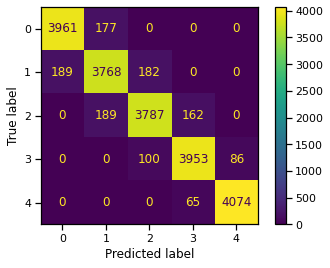

In [41]:
#Matriz de confusão 
cm = confusion_matrix(teste_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Árvore de Decisão

In [42]:
dt =  DecisionTreeClassifier(max_depth = 2, random_state=0)

model = dt.fit(treino_x, treino_y)
y_pred = dt.predict(teste_x)

In [43]:
print("Acurácia:",metrics.accuracy_score(teste_y, y_pred))
print("Precisão:",metrics.precision_score(teste_y, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(teste_y, y_pred, average='weighted')) 
print("F1:",metrics.f1_score(teste_y, y_pred, average='weighted'))

Acurácia: 0.599961339583434
Precisão: 0.39995409221496064
Recall: 0.599961339583434
F1: 0.466620489811882


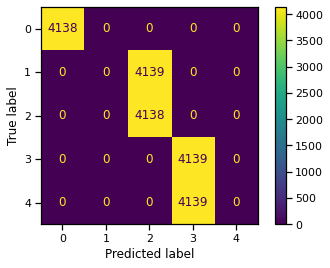

In [44]:
cm = confusion_matrix(teste_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Random Forest Classifier

In [45]:
rf = RandomForestClassifier(max_depth=1, random_state = 0)

model = rf.fit(treino_x, treino_y)
y_pred = rf.predict(teste_x)

In [46]:
print("Acurácia:",metrics.accuracy_score(teste_y, y_pred))
print("Precisão:",metrics.precision_score(teste_y, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(teste_y, y_pred, average='weighted'))
print("F1:",metrics.f1_score(teste_y, y_pred, average='weighted'))

Acurácia: 0.9718262214275358
Precisão: 0.9743365795299784
Recall: 0.9718262214275358
F1: 0.9720444775443012


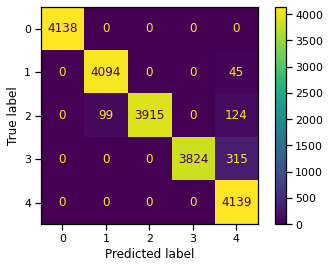

In [47]:
cm = confusion_matrix(teste_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Otimizando com Cross Validation

### Regressão Logística

In [48]:
param_grid = {
     'penalty' : ['l1', 'l2'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver' : ['liblinear']
}

In [49]:
lregression = LogisticRegression(random_state=0)

In [50]:
regression_cv = RandomizedSearchCV(
    lregression, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=None, random_state = 0
)

In [51]:
lcv = regression_cv.fit(x_balanced, y_balanced)

In [52]:
lcv.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

In [53]:
lrn = LogisticRegression(**lcv.best_params_, random_state = 0)

model = lrn.fit(treino_x, treino_y)
y_pred = lrn.predict(teste_x)

In [54]:
print("Acurácia:",metrics.accuracy_score(teste_y, y_pred))
print("Precisão:",metrics.precision_score(teste_y, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(teste_y, y_pred, average='weighted')) 
print("F1:",metrics.f1_score(teste_y, y_pred, average='weighted'))

Acurácia: 0.8870632581066061
Precisão: 0.8850345890877048
Recall: 0.8870632581066061
F1: 0.8832411234303785


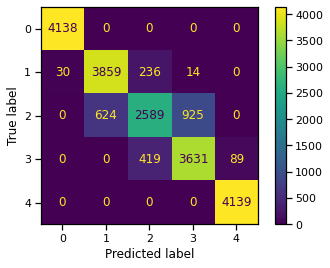

In [55]:
cm = confusion_matrix(teste_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Árvore de decisão

In [56]:
param_grid =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]
}

In [57]:
dt = DecisionTreeClassifier(random_state=0)

In [58]:
dt_cv = RandomizedSearchCV(
    dt, param_grid, n_iter=2, cv=3, scoring="recall", n_jobs=None, random_state = 0
)

In [59]:
dtcv = dt_cv.fit(x_balanced, y_balanced)

In [60]:
dtcv.best_params_

{'min_samples_leaf': 2, 'max_depth': 3}

In [61]:
dtn = DecisionTreeClassifier(**dtcv.best_params_, random_state = 0)

model = dtn.fit(treino_x, treino_y)
y_pred = dtn.predict(teste_x)

In [62]:
print("Acurácia:",metrics.accuracy_score(teste_y, y_pred))
print("Precisão:",metrics.precision_score(teste_y, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(teste_y, y_pred, average='weighted')) 
print("F1:",metrics.f1_score(teste_y, y_pred, average='weighted'))

Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1: 1.0


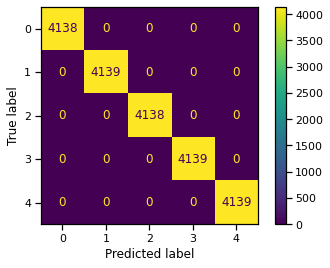

In [63]:
cm = confusion_matrix(teste_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Random Forest Classifier

In [64]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [65]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [66]:
rforest = RandomForestClassifier(random_state=0)

In [67]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=None, random_state = 0
)

In [68]:
rcv = random_cv.fit(x_balanced, y_balanced)

In [69]:
rcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 2,
 'criterion': 'entropy',
 'bootstrap': True}

In [70]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = 0)

model = rfn.fit(treino_x, treino_y)
y_pred = rfn.predict(teste_x)

In [71]:
print("Acurácia:",metrics.accuracy_score(teste_y, y_pred))
print("Precisão:",metrics.precision_score(teste_y, y_pred, average='weighted'))
print("Recall:",metrics.recall_score(teste_y, y_pred, average='weighted')) 
print("F1:",metrics.f1_score(teste_y, y_pred, average='weighted'))

Acurácia: 0.8916058570531098
Precisão: 0.9033357749069214
Recall: 0.8916058570531098
F1: 0.8905938822785883


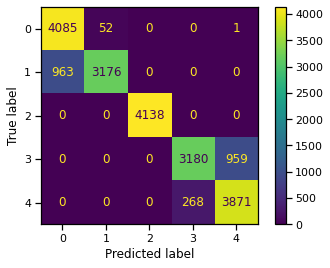

In [72]:
cm = confusion_matrix(teste_y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Salvando o modelo

In [73]:
import pickle

In [74]:
modelo_treinado = 'modelo.sav'

In [75]:
pickle.dump(rf, open(modelo_treinado, 'wb'))